In [50]:
import pandas as pd
import numpy as np 
import seaborn as sns

Analyse building structures features

In [51]:
path = '../raw_data/building/csv_building_structure.csv'
df = pd.read_csv(path).set_index('building_id')

values_path = '../raw_data/challenge_data/train_labels.csv'
values = pd.read_csv(values_path).set_index('building_id')

In [52]:
df.shape

(762106, 30)

In [53]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
district_id,762106.0,25.767835,5.807555,12.0,22.0,24.0,30.0,36.0
vdcmun_id,762106.0,2582.688357,581.172767,1201.0,2204.0,2410.0,3010.0,3611.0
ward_id,762106.0,258274.277335,58117.348412,120101.0,220402.0,241004.0,301006.0,361108.0
count_floors_pre_eq,762106.0,2.087783,0.655101,1.0,2.0,2.0,2.0,9.0
count_floors_post_eq,762106.0,1.252058,1.063275,0.0,0.0,1.0,2.0,9.0
age_building,762106.0,24.326405,65.043704,0.0,9.0,16.0,27.0,999.0
plinth_area_sq_ft,762106.0,406.672576,226.779371,70.0,280.0,358.0,470.0,5000.0
height_ft_pre_eq,762106.0,16.049372,5.493878,6.0,12.0,16.0,18.0,99.0
height_ft_post_eq,762106.0,9.868817,8.574169,0.0,0.0,11.0,16.0,99.0
has_superstructure_adobe_mud,762106.0,0.042401,0.201502,0.0,0.0,0.0,0.0,1.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 762106 entries, 120101000011 to 366709001281
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   district_id                             762106 non-null  int64 
 1   vdcmun_id                               762106 non-null  int64 
 2   ward_id                                 762106 non-null  int64 
 3   count_floors_pre_eq                     762106 non-null  int64 
 4   count_floors_post_eq                    762106 non-null  int64 
 5   age_building                            762106 non-null  int64 
 6   plinth_area_sq_ft                       762106 non-null  int64 
 7   height_ft_pre_eq                        762106 non-null  int64 
 8   height_ft_post_eq                       762106 non-null  int64 
 9   land_surface_condition                  762106 non-null  object
 10  foundation_type                        

In [55]:
#Let's begin with insights about the target

In [56]:
d = {"Grade 1": 1,
     "Grade 2": 2,
     "Grade 3": 3,
     "Grade 4": 4,
     "Grade 5": 5,
     }

df_2 = df['damage_grade'].map(d)


In [57]:
#df['damage_grade'].map(d).plot.bar();

In [58]:
df['damage_grade'].value_counts()/len(df)*100


Grade 5    36.184730
Grade 4    24.123153
Grade 3    17.899347
Grade 2    11.449457
Grade 1    10.341737
Name: damage_grade, dtype: float64

In [59]:
#removing naan from damage grade, position, plan_configuration,technical_solution_proposed

In [60]:
pd.Series(df.isna().sum(axis=0))


district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_superstructure_cement_mortar_brick     0
has_supers

In [61]:
df.isna().sum(axis=0)[df.isna().sum(axis=0) > 0]


position                        1
plan_configuration              1
damage_grade                   12
technical_solution_proposed    12
dtype: int64

In [62]:
dff=df.dropna()

In [63]:
dff.isna().sum(axis=0)[df.isna().sum(axis=0) > 0]


position                       0
plan_configuration             0
damage_grade                   0
technical_solution_proposed    0
dtype: int64

In [64]:
dff.damage_grade.unique()

array(['Grade 3', 'Grade 5', 'Grade 2', 'Grade 1', 'Grade 4'],
      dtype=object)

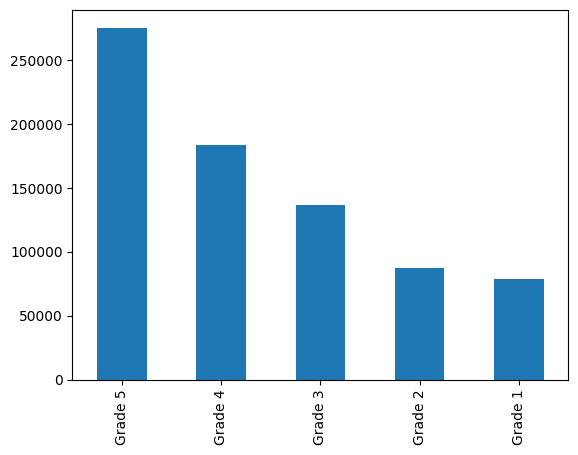

In [65]:
dff.damage_grade.value_counts().plot(kind="bar");

In [66]:
d = {"Grade 1": 1,
     "Grade 2": 2,
     "Grade 3": 3,
     "Grade 4": 4,
     "Grade 5": 5,
     }

dff["damage_grade"].map(d).mean()


3.643606956622149

In [67]:
values['damage_grade'].mean()


2.2382723013342236

In [68]:
for col, name in zip(dff, dff.columns):
    if dff[col].dtypes == 'object':
        print(name, dff[col].unique())

land_surface_condition ['Flat' 'Moderate slope' 'Steep slope']
foundation_type ['Other' 'Mud mortar-Stone/Brick' 'Cement-Stone/Brick' 'Bamboo/Timber'
 'RC']
roof_type ['Bamboo/Timber-Light roof' 'Bamboo/Timber-Heavy roof' 'RCC/RB/RBC']
ground_floor_type ['Mud' 'Brick/Stone' 'RC' 'Timber' 'Other']
other_floor_type ['Not applicable' 'TImber/Bamboo-Mud' 'Timber-Planck' 'RCC/RB/RBC']
position ['Not attached' 'Attached-1 side' 'Attached-2 side' 'Attached-3 side']
plan_configuration ['Rectangular' 'L-shape' 'Square' 'T-shape' 'Multi-projected' 'H-shape'
 'U-shape' 'Others' 'E-shape' 'Building with Central Courtyard']
condition_post_eq ['Damaged-Used in risk' 'Damaged-Repaired and used'
 'Damaged-Rubble unclear' 'Not damaged' 'Damaged-Not used'
 'Damaged-Rubble clear' 'Damaged-Rubble Clear-New building built'
 'Covered by landslide']
damage_grade ['Grade 3' 'Grade 5' 'Grade 2' 'Grade 1' 'Grade 4']
technical_solution_proposed ['Major repair' 'Reconstruction' 'Minor repair' 'No need']


# Land surface condition
### land_surface_condition :surface condition of the land where the building was built. Posible values:flat, Moderate slope, steep slope.
###( type: categorical)


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
col = "land_surface_condition"
df[col].value_counts()

Flat              631675
Moderate slope    105640
Steep slope        24791
Name: land_surface_condition, dtype: int64

In [ ]:
df['land_surface_condition'].value_counts()/len(df)*100


Flat              82.885452
Moderate slope    13.861589
Steep slope        3.252960
Name: land_surface_condition, dtype: float64

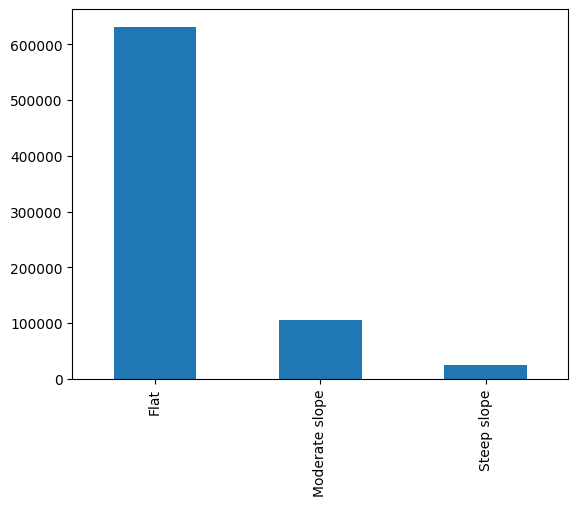

In [71]:
dff.land_surface_condition.value_counts().plot(kind="bar");

In [84]:
heatmap_df = dff[["damage_grade", "land_surface_condition"]].value_counts().reset_index()
heatmap_df = heatmap_df.groupby(['land_surface_condition','damage_grade']).sum()
heatmap_df.reset_index(inplace=True)
heatmap_df = heatmap_df.rename(columns={0:'values'})
heatmap_df

,land_surface_condition,damage_grade,values
0,Flat,Grade 1,68849
1,Flat,Grade 2,73166
2,Flat,Grade 3,111244
3,Flat,Grade 4,148615
4,Flat,Grade 5,229789
5,Moderate slope,Grade 1,8063
6,Moderate slope,Grade 2,11813
7,Moderate slope,Grade 3,20624
8,Moderate slope,Grade 4,28694
9,Moderate slope,Grade 5,36446


In [85]:
heatmap_df = heatmap_df.pivot(index=['land_surface_condition'], 
                 columns=['damage_grade'],
                 values=['values'])
heatmap_df

values                                
damage_grade           Grade 1 Grade 2 Grade 3 Grade 4 Grade 5
land_surface_condition                                        
Flat                     68849   73166  111244  148615  229789
Moderate slope            8063   11813   20624   28694   36446
Steep slope               1903    2278    4544    6535    9531

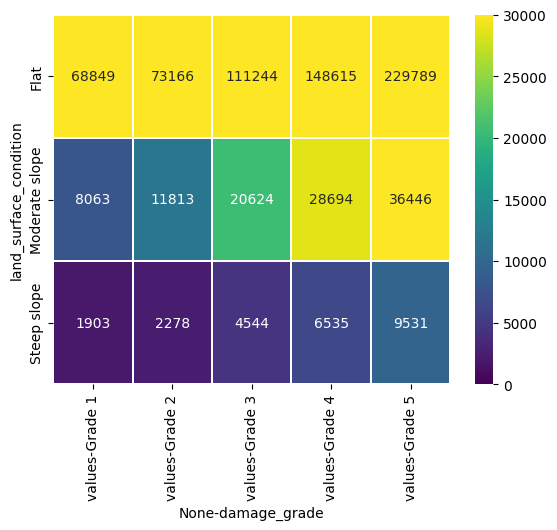

In [86]:
sns.heatmap(heatmap_df,
            linewidths=0.1, vmax=30000, vmin=0,
            cmap='viridis', linecolor='white', annot=True, fmt='d');

In [29]:
expected_value = pd.DataFrame(index=cmap.index, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"expected_value_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
(expected_value/100).sort_values(by="expected_value_damage")

NameError: name 'cmap' is not defined

# Foundation
### foundation_type:type of foundation used while building. Possible values: Mud mortar-Stone/Brick, Bamboo/Timber , Cement-Stone/Brick, RC , Other .
### (type: categorical)


In [77]:
col = "foundation_type"
dff[col].value_counts()

Mud mortar-Stone/Brick    628705
Bamboo/Timber              57472
Cement-Stone/Brick         39245
RC                         32120
Other                       4552
Name: foundation_type, dtype: int64

In [78]:
heatmap_df = dff[["damage_grade", "foundation_type"]].value_counts().reset_index()
heatmap_df = heatmap_df.groupby(['foundation_type','damage_grade']).sum()
heatmap_df.reset_index(inplace=True)
heatmap_df = heatmap_df.rename(columns={0:'values'})
heatmap_df

,foundation_type,damage_grade,values
0,Bamboo/Timber,Grade 1,17201
1,Bamboo/Timber,Grade 2,13357
2,Bamboo/Timber,Grade 3,13244
3,Bamboo/Timber,Grade 4,8368
4,Bamboo/Timber,Grade 5,5302
5,Cement-Stone/Brick,Grade 1,11642
6,Cement-Stone/Brick,Grade 2,8847
7,Cement-Stone/Brick,Grade 3,7104
8,Cement-Stone/Brick,Grade 4,5621
9,Cement-Stone/Brick,Grade 5,6031


In [79]:
heatmap_df = heatmap_df.pivot(index=['foundation_type'], 
                 columns=['damage_grade'],
                 values=['values'])
heatmap_df

values                                
damage_grade           Grade 1 Grade 2 Grade 3 Grade 4 Grade 5
foundation_type                                               
Bamboo/Timber            17201   13357   13244    8368    5302
Cement-Stone/Brick       11642    8847    7104    5621    6031
Mud mortar-Stone/Brick   29484   56044  112442  168458  262277
Other                     1364     405     459     691    1633
RC                       19124    8604    3163     706     523

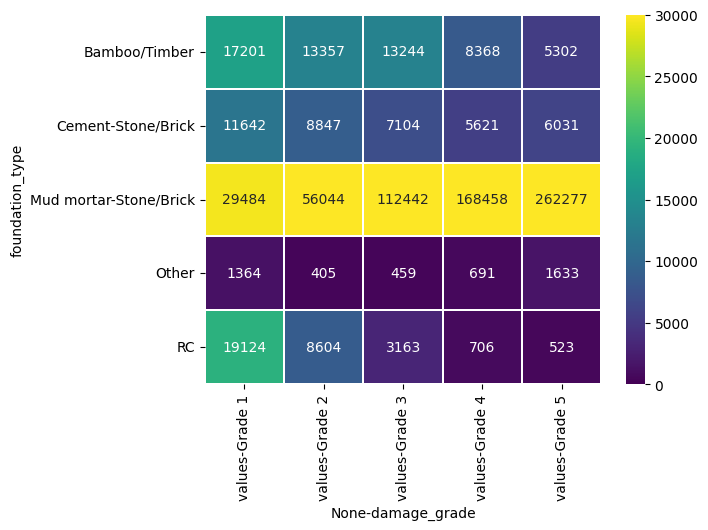

In [82]:
sns.heatmap(heatmap_df,
            linewidths=0.1, vmax=30000, vmin=0,
            cmap='viridis', linecolor='white', annot=True, fmt='d');

# Roof type
### roof_type (type: categorical): type of roof used while building. Possible values:Bamboo/Timber-Light roof ,Bamboo/Timber-Heavy roof ,RCC/RB/RBC 


In [81]:
col = "roof_type"
df[col].value_counts()

Bamboo/Timber-Light roof    503748
Bamboo/Timber-Heavy roof    213774
RCC/RB/RBC                   44584
Name: roof_type, dtype: int64

In [87]:
heatmap_df = dff[["damage_grade", "roof_type"]].value_counts().reset_index()
heatmap_df = heatmap_df.groupby(['roof_type','damage_grade']).sum()
heatmap_df.reset_index(inplace=True)
heatmap_df = heatmap_df.rename(columns={0:'values'})
heatmap_df

,roof_type,damage_grade,values
0,Bamboo/Timber-Heavy roof,Grade 1,13498
1,Bamboo/Timber-Heavy roof,Grade 2,22394
2,Bamboo/Timber-Heavy roof,Grade 3,41267
3,Bamboo/Timber-Heavy roof,Grade 4,51757
4,Bamboo/Timber-Heavy roof,Grade 5,84858
5,Bamboo/Timber-Light roof,Grade 1,40989
6,Bamboo/Timber-Light roof,Grade 2,52552
7,Bamboo/Timber-Light roof,Grade 3,89821
8,Bamboo/Timber-Light roof,Grade 4,130513
9,Bamboo/Timber-Light roof,Grade 5,189861


In [88]:
heatmap_df = heatmap_df.pivot(index=['roof_type'], 
                 columns=['damage_grade'],
                 values=['values'])
heatmap_df

values                                
damage_grade             Grade 1 Grade 2 Grade 3 Grade 4 Grade 5
roof_type                                                       
Bamboo/Timber-Heavy roof   13498   22394   41267   51757   84858
Bamboo/Timber-Light roof   40989   52552   89821  130513  189861
RCC/RB/RBC                 24328   12311    5324    1574    1047

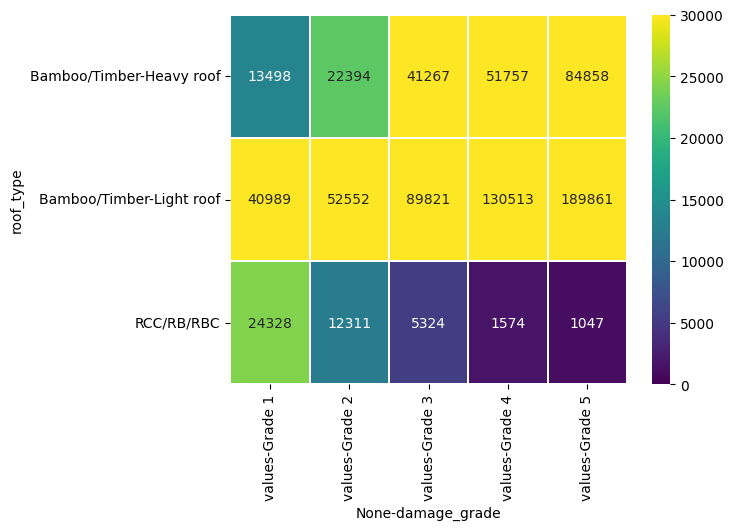

In [89]:
sns.heatmap(heatmap_df,
            linewidths=0.1, vmax=30000, vmin=0,
            cmap='viridis', linecolor='white', annot=True, fmt='d');

# Ground floor type
## ground_floor_type : type of the ground floor. Possible values:Mud, RC,Brick/Stone,Timber, Other
(type: categorical)

In [90]:
col = "ground_floor_type"
df[col].value_counts()

Mud            618217
RC              73149
Brick/Stone     66093
Timber           3594
Other            1053
Name: ground_floor_type, dtype: int64

In [91]:
heatmap_df = dff[["damage_grade", "ground_floor_type"]].value_counts().reset_index()
heatmap_df = heatmap_df.groupby(['ground_floor_type','damage_grade']).sum()
heatmap_df.reset_index(inplace=True)
heatmap_df = heatmap_df.rename(columns={0:'values'})
heatmap_df

,ground_floor_type,damage_grade,values
0,Brick/Stone,Grade 1,5906
1,Brick/Stone,Grade 2,6721
2,Brick/Stone,Grade 3,10833
3,Brick/Stone,Grade 4,16592
4,Brick/Stone,Grade 5,26041
5,Mud,Grade 1,38073
6,Mud,Grade 2,59487
7,Mud,Grade 3,114001
8,Mud,Grade 4,161466
9,Mud,Grade 5,245178


In [93]:
heatmap_df = heatmap_df.pivot(index=['ground_floor_type'], 
                 columns=['damage_grade'],
                 values=['values'])
heatmap_df

values                                
damage_grade      Grade 1 Grade 2 Grade 3 Grade 4 Grade 5
ground_floor_type                                        
Brick/Stone          5906    6721   10833   16592   26041
Mud                 38073   59487  114001  161466  245178
Other                 291     200     239     176     147
RC                  33862   20173   10813    4864    3437
Timber                683     676     526     746     963

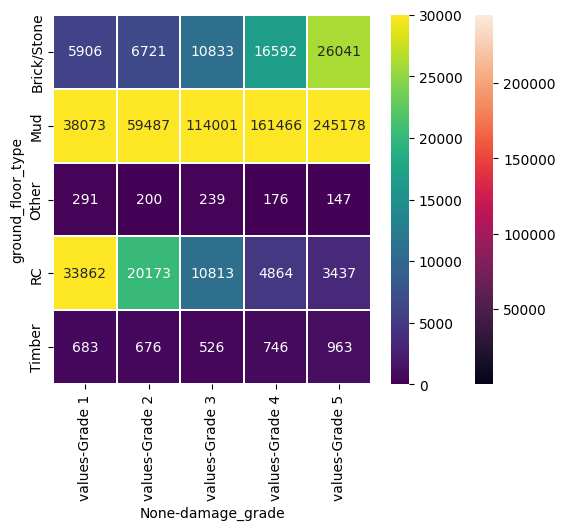

In [95]:
sns.heatmap(heatmap_df)
sns.heatmap(heatmap_df,
            linewidths=0.1, vmax=30000, vmin=0,
            cmap='viridis', linecolor='white', annot=True, fmt='d');

# Other floor type
### other_floor_type : type of constructions used in higher than the ground floors (except of roof).
(type: categorical)

In [96]:
col = "other_floor_type"
df[col].value_counts()

TImber/Bamboo-Mud    486907
Timber-Planck        123635
Not applicable       118822
RCC/RB/RBC            32742
Name: other_floor_type, dtype: int64

In [97]:
heatmap_df = dff[["damage_grade", "other_floor_type"]].value_counts().reset_index()
heatmap_df = heatmap_df.groupby(['other_floor_type','damage_grade']).sum()
heatmap_df.reset_index(inplace=True)
heatmap_df = heatmap_df.rename(columns={0:'values'})
heatmap_df

,other_floor_type,damage_grade,values
0,Not applicable,Grade 1,30685
1,Not applicable,Grade 2,21113
2,Not applicable,Grade 3,18035
3,Not applicable,Grade 4,15617
4,Not applicable,Grade 5,33371
5,RCC/RB/RBC,Grade 1,16734
6,RCC/RB/RBC,Grade 2,8953
7,RCC/RB/RBC,Grade 3,4271
8,RCC/RB/RBC,Grade 4,1585
9,RCC/RB/RBC,Grade 5,1199


In [98]:
heatmap_df = heatmap_df.pivot(index=['other_floor_type'], 
                 columns=['damage_grade'],
                 values=['values'])
heatmap_df

values                                
damage_grade      Grade 1 Grade 2 Grade 3 Grade 4 Grade 5
other_floor_type                                         
Not applicable      30685   21113   18035   15617   33371
RCC/RB/RBC          16734    8953    4271    1585    1199
TImber/Bamboo-Mud   19912   43745   93050  139733  190467
Timber-Planck       11484   13446   21056   26909   50729

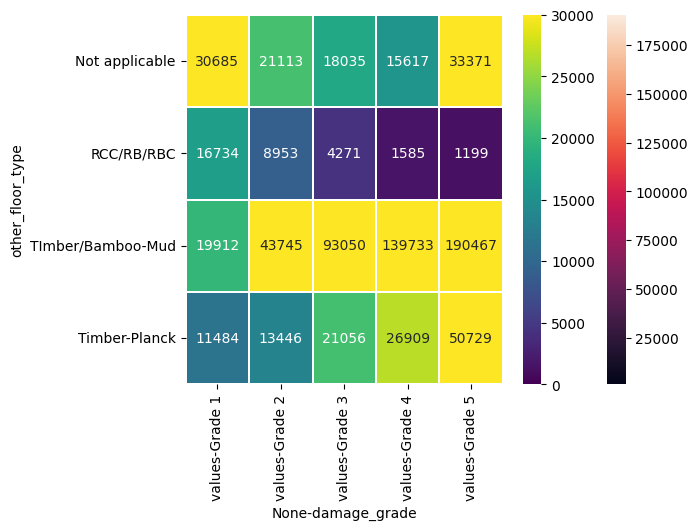

In [99]:
sns.heatmap(heatmap_df)
sns.heatmap(heatmap_df,
            linewidths=0.1, vmax=30000, vmin=0,
            cmap='viridis', linecolor='white', annot=True, fmt='d');

# Position
## position: position of the building. Possible values:Not attached,Attached-1 side, Attached-2 side, Attached-3 side
(type: categorical)

In [100]:
col = "position"
df[col].value_counts()

Not attached       604453
Attached-1 side    129432
Attached-2 side     26910
Attached-3 side      1310
Name: position, dtype: int64

In [102]:
heatmap_df = dff[["damage_grade", "position"]].value_counts().reset_index()
heatmap_df = heatmap_df.groupby(['position','damage_grade']).sum()
heatmap_df.reset_index(inplace=True)
heatmap_df = heatmap_df.rename(columns={0:'values'})
heatmap_df

,position,damage_grade,values
0,Attached-1 side,Grade 1,10911
1,Attached-1 side,Grade 2,12470
2,Attached-1 side,Grade 3,20940
3,Attached-1 side,Grade 4,32178
4,Attached-1 side,Grade 5,52932
5,Attached-2 side,Grade 1,5181
6,Attached-2 side,Grade 2,4069
7,Attached-2 side,Grade 3,4541
8,Attached-2 side,Grade 4,5571
9,Attached-2 side,Grade 5,7548


In [104]:
heatmap_df = heatmap_df.pivot(index=['position'], 
                 columns=['damage_grade'],
                 values=['values'])
heatmap_df

values                                
damage_grade    Grade 1 Grade 2 Grade 3 Grade 4 Grade 5
position                                               
Attached-1 side   10911   12470   20940   32178   52932
Attached-2 side    5181    4069    4541    5571    7548
Attached-3 side     341     251     227     292     199
Not attached      62382   70467  110704  145803  215087

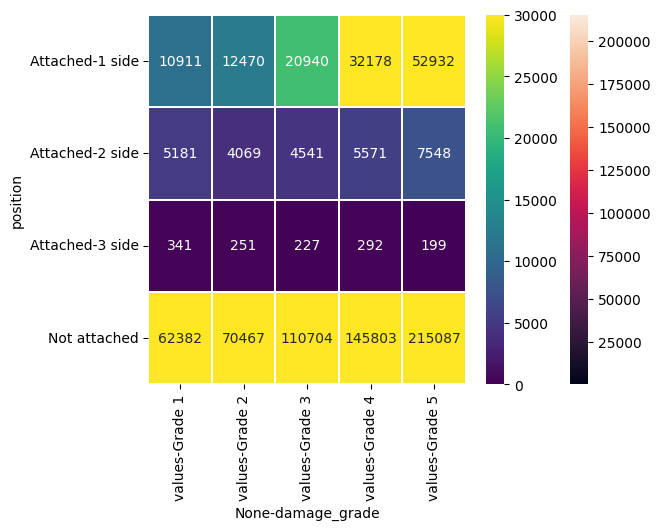

In [105]:
sns.heatmap(heatmap_df)
sns.heatmap(heatmap_df,
            linewidths=0.1, vmax=30000, vmin=0,
            cmap='viridis', linecolor='white', annot=True, fmt='d');

# Plan configuration
## plan_configuration: building plan configuration.
(type: categorical)

In [106]:
col = "plan_configuration"
df[col].value_counts()

Rectangular                        731257
Square                              17576
L-shape                             10079
T-shape                               969
Multi-projected                       940
Others                                518
U-shape                               448
E-shape                               140
Building with Central Courtyard        98
H-shape                                80
Name: plan_configuration, dtype: int64

In [107]:
heatmap_df = dff[["damage_grade", "plan_configuration"]].value_counts().reset_index()
heatmap_df = heatmap_df.groupby(['plan_configuration','damage_grade']).sum()
heatmap_df.reset_index(inplace=True)
heatmap_df = heatmap_df.rename(columns={0:'values'})
heatmap_df

,plan_configuration,damage_grade,values
0,Building with Central Courtyard,Grade 1,32
1,Building with Central Courtyard,Grade 2,32
2,Building with Central Courtyard,Grade 3,16
3,Building with Central Courtyard,Grade 4,9
4,Building with Central Courtyard,Grade 5,9
5,E-shape,Grade 1,18
6,E-shape,Grade 2,25
7,E-shape,Grade 3,29
8,E-shape,Grade 4,29
9,E-shape,Grade 5,39


In [108]:
heatmap_df = heatmap_df.pivot(index=['plan_configuration'], 
                 columns=['damage_grade'],
                 values=['values'])
heatmap_df

values                                
damage_grade                    Grade 1 Grade 2 Grade 3 Grade 4 Grade 5
plan_configuration                                                     
Building with Central Courtyard      32      32      16       9       9
E-shape                              18      25      29      29      39
H-shape                               9      14      17      23      17
L-shape                            2781    2209    2096    1798    1195
Multi-projected                     270     201     253     158      58
Others                              222      64     121      61      50
Rectangular                       72627   82507  131216  178268  266628
Square                             2572    1888    2348    3236    7532
T-shape                             170     215     221     186     177
U-shape                             114     102      95      76      61

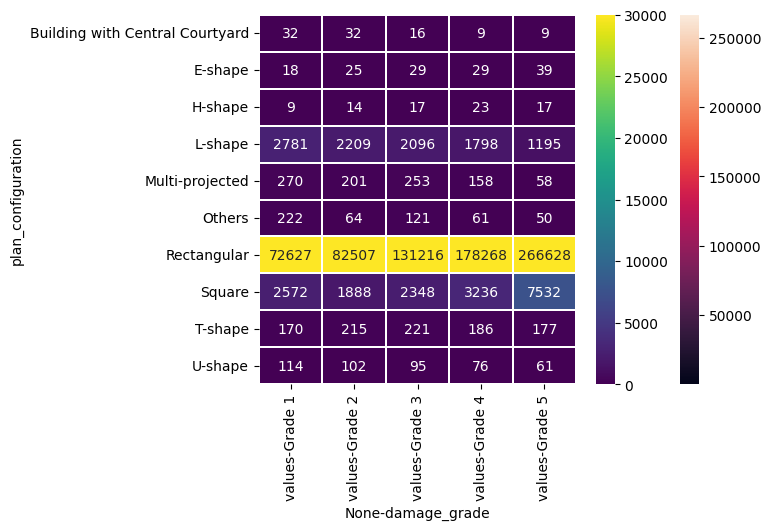

In [109]:
sns.heatmap(heatmap_df)
sns.heatmap(heatmap_df,
            linewidths=0.1, vmax=30000, vmin=0,
            cmap='viridis', linecolor='white', annot=True, fmt='d');

# Count floors
### count_floors_pre_eq:number of floors in the building before the earthquake.
###( type: int)


In [112]:
col = 'count_floors_pre_eq'
dff[col].describe()

count    762094.000000
mean          2.087787
std           0.655104
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           9.000000
Name: count_floors_pre_eq, dtype: float64

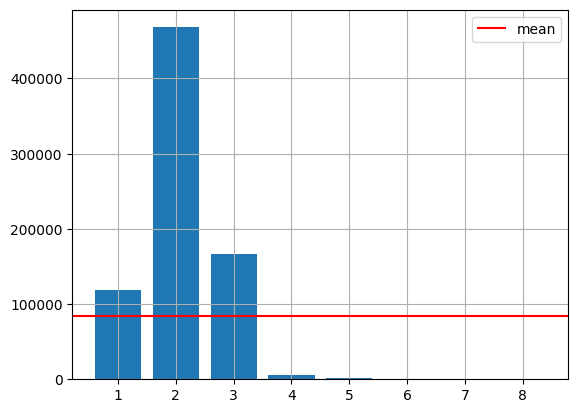

In [113]:
dff[col].hist(align="mid", rwidth=0.8, 
                               bins=np.arange(min(df[col]), max(df[col])+1)-0.5)
plt.axhline(df.loc[:,col].value_counts().mean(), color='r')
plt.legend(labels=["mean"])

In [114]:
dff[col].value_counts()


2    468103
3    166993
1    118899
4      6085
5      1569
6       332
7        88
9        13
8        12
Name: count_floors_pre_eq, dtype: int64

In [33]:
#There are very few buildings with more than 6 floors (outliers?)
#Let's visualize the probabilities of damages level for each floor count. I added the probabilities of the wholedataset for comparison


In [115]:
heatmap_df = dff[["damage_grade", "count_floors_pre_eq"]].value_counts().reset_index()
heatmap_df = heatmap_df.groupby(['count_floors_pre_eq','damage_grade']).sum()
heatmap_df.reset_index(inplace=True)
heatmap_df = heatmap_df.rename(columns={0:'values'})
heatmap_df


,count_floors_pre_eq,damage_grade,values
0,1,Grade 1,30774
1,1,Grade 2,21147
2,1,Grade 3,18018
3,1,Grade 4,15630
4,1,Grade 5,33330
5,2,Grade 1,37917
6,2,Grade 2,54233
7,2,Grade 3,93555
8,2,Grade 4,120727
9,2,Grade 5,161671


In [116]:
heatmap_df = heatmap_df.pivot(index=['count_floors_pre_eq'], 
                 columns=['damage_grade'],
                 values=['values'])
heatmap_df

values                                
damage_grade        Grade 1 Grade 2 Grade 3 Grade 4 Grade 5
count_floors_pre_eq                                        
1                     30774   21147   18018   15630   33330
2                     37917   54233   93555  120727  161671
3                      6859   10271   23613   46332   79918
4                      2238    1153     965    1005     724
5                       811     336     194     135      93
6                       171      87      44       9      21
7                        36      26      19       2       5
8                         5       3       1       2       1
9                         4       1       3       2       3

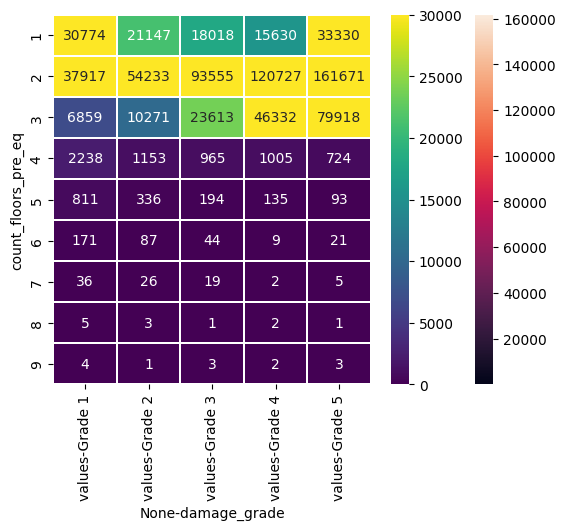

In [117]:
sns.heatmap(heatmap_df)
sns.heatmap(heatmap_df,
            linewidths=0.1, vmax=30000, vmin=0,
            cmap='viridis', linecolor='white', annot=True, fmt='d');

In [36]:
#Ploting the mean of damages level against count floors of building. I added the mean of the wholedataset for comparison.



In [118]:
heatmap_df = heatmap_df.drop(index="dataset")
expected_value = pd.DataFrame(index=cmap.index, columns=["expected_value_damage", "frequency"])
for i in expected_value.index:
    expected_value.loc[i,"expected_value_damage"] = cmap.loc[i,1]+cmap.loc[i,2]*2+cmap.loc[i,3]*3
expected_value["frequency"] = df[col].value_counts().sort_index()/len(df)*100
expected_value.plot(y="expected_value_damage")
plt.axhline(dff['damage_grade'].mean(), color='r')
plt.legend(labels=["expected value damage", "dataset mean"])

KeyError: "['dataset'] not found in axis"

In [38]:
expected_value = expected_value.sort_index()
expected_value.loc["dataset","expected_value_damage"] = values['damage_grade'].mean()
expected_value

NameError: name 'expected_value' is not defined

# Age_building
### count_floors_pre_eq:number of floors in the building before the earthquake.
###( type: int)


In [39]:
#AGE_BUILDING

In [119]:
col = "age_building"
dff[col].describe()

count    762094.000000
mean         24.325031
std          65.034555
min           0.000000
25%           9.000000
50%          16.000000
75%          27.000000
max         999.000000
Name: age_building, dtype: float64

In [120]:
dff[col].value_counts()

15     49983
20     46525
10     39794
25     37063
12     36458
       ...  
148        1
199        1
164        1
149        1
144        1
Name: age_building, Length: 176, dtype: int64

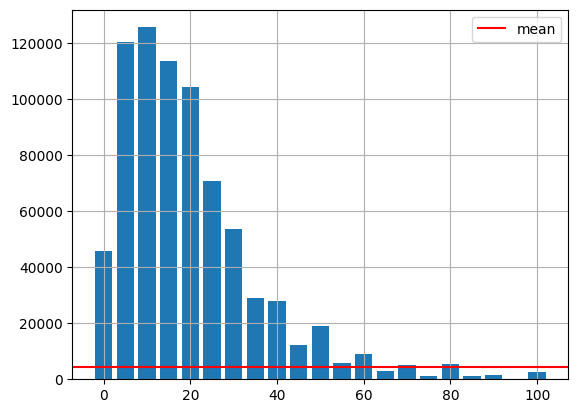

In [121]:
dff[col].hist(align="mid", rwidth=0.8, 
                               bins=np.arange(min(df[col]), 100+10, 5)-2.5)
plt.axhline(df.loc[:,col].value_counts().mean(), color='r')
plt.legend(labels=["mean"])

<AxesSubplot: >

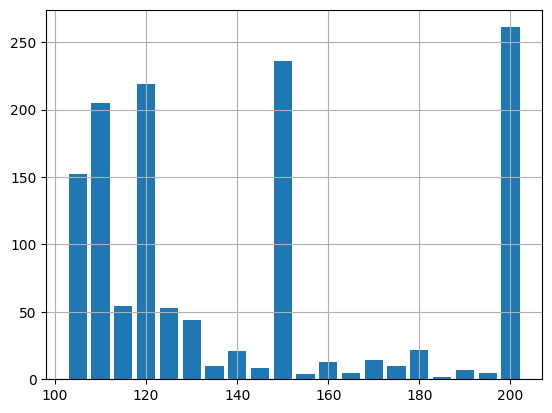

In [122]:
df[col].hist(align="mid", rwidth=0.8, 
                               bins=np.arange(105, 200+10, 5)-2.5)

In [124]:
len(dff[dff[col] == 995])


0

In [125]:
heatmap_df = dff[["damage_grade", "age_building"]].value_counts().reset_index()
heatmap_df = heatmap_df.groupby(['age_building','damage_grade']).sum()
heatmap_df.reset_index(inplace=True)
heatmap_df = heatmap_df.rename(columns={0:'values'})
heatmap_df

,age_building,damage_grade,values
0,0,Grade 1,2920
1,0,Grade 2,290
2,0,Grade 3,194
3,0,Grade 4,234
4,0,Grade 5,1094
...,...,...,...
685,999,Grade 1,374
686,999,Grade 2,350
687,999,Grade 3,605
688,999,Grade 4,685


In [126]:
heatmap_df = heatmap_df.pivot(index=['age_building'], 
                 columns=['damage_grade'],
                 values=['values'])
heatmap_df

values                                
damage_grade Grade 1 Grade 2 Grade 3 Grade 4 Grade 5
age_building                                        
0             2920.0   290.0   194.0   234.0  1094.0
1             7175.0  2849.0  2286.0  2405.0  4670.0
2             5690.0  3943.0  3421.0  3375.0  5214.0
3             5766.0  4667.0  4124.0  4079.0  5794.0
4             5000.0  4205.0  4188.0  4249.0  5761.0
...              ...     ...     ...     ...     ...
195              NaN     NaN     NaN     1.0     1.0
196              NaN     NaN     NaN     NaN     2.0
199              NaN     NaN     NaN     1.0     NaN
200              4.0    12.0    48.0    78.0   118.0
999            374.0   350.0   605.0   685.0  1130.0

[176 rows x 5 columns]

ValueError: Unknown format code 'd' for object of type 'float'

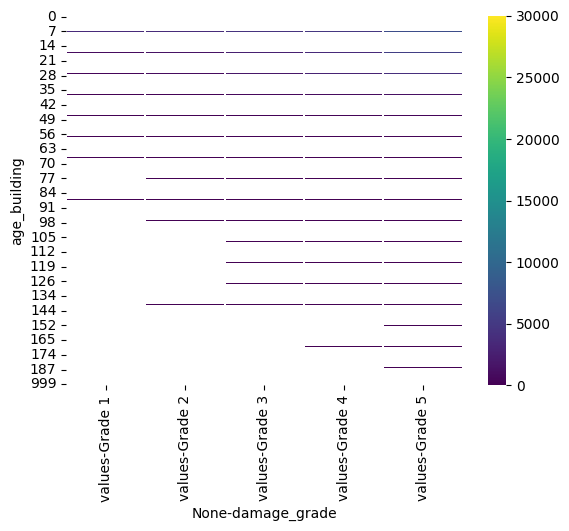

In [127]:
sns.heatmap(heatmap_df,
            linewidths=0.1, vmax=30000, vmin=0,
            cmap='viridis', linecolor='white', annot=True, fmt='d');

# Plinth area
## Describes the plinth area in square meters





In [130]:
col = 'plinth_area_sq_ft'
dff[col].describe()


count    762094.000000
mean        406.673668
std         226.780437
min          70.000000
25%         280.000000
50%         358.000000
75%         470.000000
max        5000.000000
Name: plinth_area_sq_ft, dtype: float64

In [131]:
dff[col].value_counts()

300     27656
450     21323
400     19961
350     19164
360     14965
        ...  
2082        1
4470        1
3410        1
1749        1
2247        1
Name: plinth_area_sq_ft, Length: 2129, dtype: int64

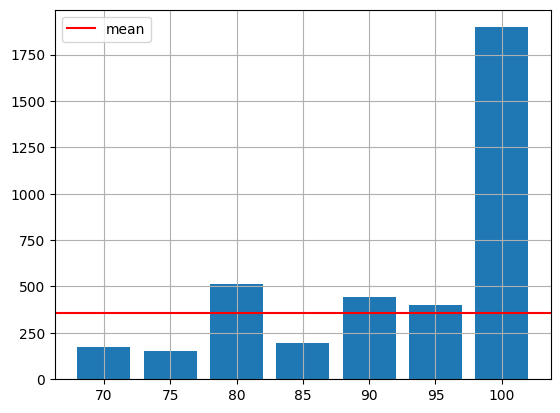

In [132]:
dff[col].hist(align="mid", rwidth=0.8, 
                               bins=np.arange(min(df[col]), 100+10, 5)-2.5)
plt.axhline(df.loc[:,col].value_counts().mean(), color='r')
plt.legend(labels=["mean"])

<AxesSubplot: >

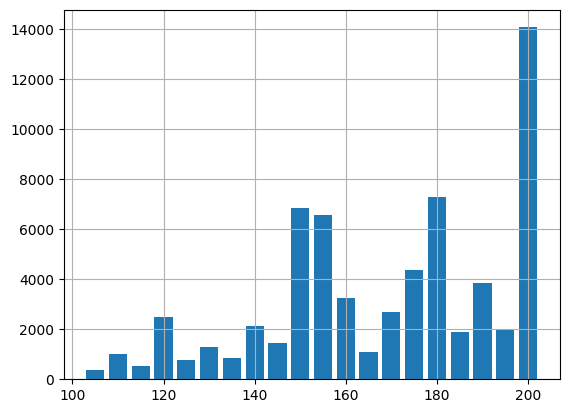

In [134]:
dff[col].hist(align="mid", rwidth=0.8, 
                               bins=np.arange(105, 200+10, 5)-2.5)

In [135]:
len(dff[dff[col] == 100])


1312

In [136]:
heatmap_df = dff[["damage_grade", "plinth_area_sq_ft"]].value_counts().reset_index()
heatmap_df = heatmap_df.groupby(['plinth_area_sq_ft','damage_grade']).sum()
heatmap_df.reset_index(inplace=True)
heatmap_df = heatmap_df.rename(columns={0:'values'})
heatmap_df

,plinth_area_sq_ft,damage_grade,values
0,70,Grade 1,26
1,70,Grade 2,13
2,70,Grade 3,20
3,70,Grade 4,23
4,70,Grade 5,30
...,...,...,...
7454,4901,Grade 1,1
7455,4928,Grade 1,1
7456,4995,Grade 5,1
7457,5000,Grade 1,5


In [137]:
heatmap_df = heatmap_df.pivot(index=['plinth_area_sq_ft'], 
                 columns=['damage_grade'],
                 values=['values'])
heatmap_df

values                                
damage_grade      Grade 1 Grade 2 Grade 3 Grade 4 Grade 5
plinth_area_sq_ft                                        
70                   26.0    13.0    20.0    23.0    30.0
71                    1.0     NaN     1.0     NaN     2.0
72                   13.0    13.0    11.0     5.0    14.0
73                    2.0     5.0     4.0     1.0     3.0
74                    1.0     NaN     2.0     1.0     1.0
...                   ...     ...     ...     ...     ...
4890                  1.0     NaN     NaN     NaN     NaN
4901                  1.0     NaN     NaN     NaN     NaN
4928                  1.0     NaN     NaN     NaN     NaN
4995                  NaN     NaN     NaN     NaN     1.0
5000                  5.0     NaN     NaN     1.0     NaN

[2129 rows x 5 columns]

ValueError: Unknown format code 'd' for object of type 'float'

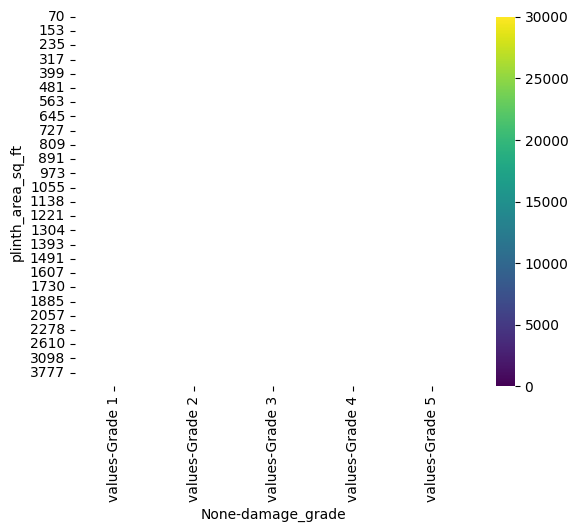

In [138]:
sns.heatmap(heatmap_df,
            linewidths=0.1, vmax=30000, vmin=0,
            cmap='viridis', linecolor='white', annot=True, fmt='d');

# Condition of the house post earthquake
condition_post_eq
###( type: object)


In [139]:
dff.condition_post_eq.unique()

array(['Damaged-Used in risk', 'Damaged-Repaired and used',
       'Damaged-Rubble unclear', 'Not damaged', 'Damaged-Not used',
       'Damaged-Rubble clear', 'Damaged-Rubble Clear-New building built',
       'Covered by landslide'], dtype=object)

In [141]:
col = "condition_post_eq"
dff[col].value_counts()

Damaged-Not used                           207968
Damaged-Rubble unclear                     125650
Damaged-Used in risk                       123843
Damaged-Repaired and used                  107791
Damaged-Rubble clear                       102191
Not damaged                                 61139
Damaged-Rubble Clear-New building built     33130
Covered by landslide                          382
Name: condition_post_eq, dtype: int64

In [142]:
heatmap_df = dff[["damage_grade", "condition_post_eq"]].value_counts().reset_index()
heatmap_df = heatmap_df.groupby(['condition_post_eq','damage_grade']).sum()
heatmap_df.reset_index(inplace=True)
heatmap_df = heatmap_df.rename(columns={0:'values'})
heatmap_df

,condition_post_eq,damage_grade,values
0,Covered by landslide,Grade 5,382
1,Damaged-Not used,Grade 2,17671
2,Damaged-Not used,Grade 3,58318
3,Damaged-Not used,Grade 4,122032
4,Damaged-Not used,Grade 5,9947
5,Damaged-Repaired and used,Grade 1,17765
6,Damaged-Repaired and used,Grade 2,32778
7,Damaged-Repaired and used,Grade 3,31867
8,Damaged-Repaired and used,Grade 4,22913
9,Damaged-Repaired and used,Grade 5,2468


In [144]:
heatmap_df = heatmap_df.pivot(index=['condition_post_eq'], 
                 columns=['damage_grade'],
                 values=['values'])
heatmap_df

values                              \
damage_grade                             Grade 1  Grade 2  Grade 3   Grade 4   
condition_post_eq                                                              
Covered by landslide                         NaN      NaN      NaN       NaN   
Damaged-Not used                             NaN  17671.0  58318.0  122032.0   
Damaged-Repaired and used                17765.0  32778.0  31867.0   22913.0   
Damaged-Rubble Clear-New building built      NaN      NaN      NaN       NaN   
Damaged-Rubble clear                         NaN      NaN      NaN       NaN   
Damaged-Rubble unclear                       NaN      NaN      NaN       NaN   
Damaged-Used in risk                         NaN  36719.0  46227.0   38899.0   
Not damaged                              61050.0     89.0      NaN       NaN   

                                                   
damage_grade                              Grade 5  
condition_post_eq                                  
Covered by landslide                        382.0  
Damaged-Not used                           9947.0  
Damaged-Repaired and used                  2468.0  
Damaged-Rubble Clear-New building built   33130.0  
Damaged-Rubble clear                     102191.0  
Damaged-Rubble unclear                   125650.0  
Damaged-Used in risk                       1998.0  
Not damaged                                   NaN

ValueError: Unknown format code 'd' for object of type 'float'

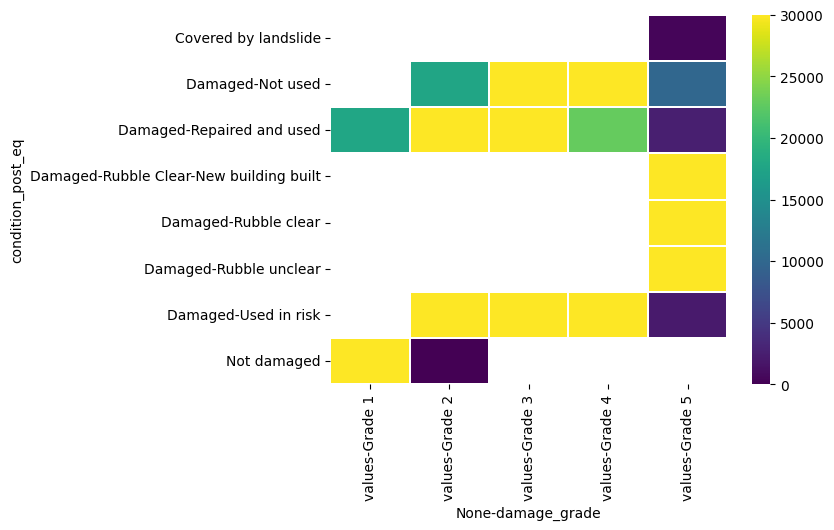

In [145]:
sns.heatmap(heatmap_df,
            linewidths=0.1, vmax=30000, vmin=0,
            cmap='viridis', linecolor='white', annot=True, fmt='d');

# Solution for the damages
## technical_solution_proposed
( type: object)


In [148]:
col = "technical_solution_proposed"
dff[col].value_counts()

Reconstruction    470219
Major repair      129415
Minor repair      110605
No need            51855
Name: technical_solution_proposed, dtype: int64

In [149]:
heatmap_df = dff[["damage_grade", "technical_solution_proposed"]].value_counts().reset_index()
heatmap_df = heatmap_df.groupby(['technical_solution_proposed','damage_grade']).sum()
heatmap_df.reset_index(inplace=True)
heatmap_df = heatmap_df.rename(columns={0:'values'})
heatmap_df

,technical_solution_proposed,damage_grade,values
0,Major repair,Grade 1,384
1,Major repair,Grade 2,10383
2,Major repair,Grade 3,101292
3,Major repair,Grade 4,17213
4,Major repair,Grade 5,143
5,Minor repair,Grade 1,26946
6,Minor repair,Grade 2,73991
7,Minor repair,Grade 3,9466
8,Minor repair,Grade 4,173
9,Minor repair,Grade 5,29


In [150]:
heatmap_df = heatmap_df.pivot(index=['technical_solution_proposed'], 
                 columns=['damage_grade'],
                 values=['values'])
heatmap_df

values                                
damage_grade                Grade 1 Grade 2 Grade 3 Grade 4 Grade 5
technical_solution_proposed                                        
Major repair                    384   10383  101292   17213     143
Minor repair                  26946   73991    9466     173      29
No need                       51285     488      56      12      14
Reconstruction                  200    2395   25598  166446  275580

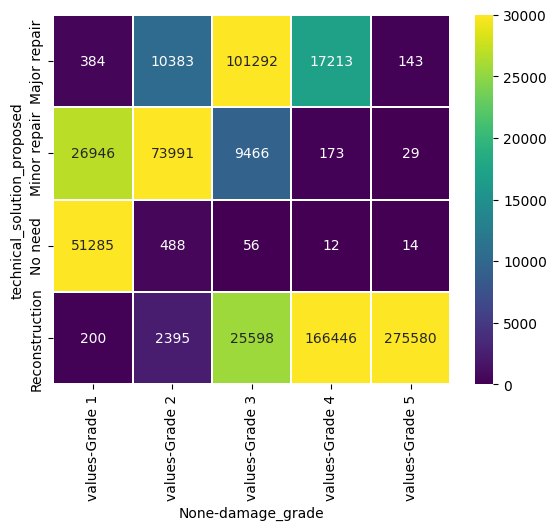

In [151]:
sns.heatmap(heatmap_df,
            linewidths=0.1, vmax=30000, vmin=0,
            cmap='viridis', linecolor='white', annot=True, fmt='d');

# Superstructure

### has_superstructure_adobe_mud (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.

### has_superstructure_mud_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.

### as_superstructure_stone_flag (type: binary): flag variable that indicates if the superstructure was made of Stone.

### has_superstructure_cement_mortar_stone (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.

### has_superstructure_mud_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.

### has_superstructure_cement_mortar_brick (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.

### has_superstructure_timber (type: binary): flag variable that indicates if the superstructure was made of Timber.

### has_superstructure_bamboo (type: binary): flag variable that indicates if the superstructure was made of Bamboo.

### has_superstructure_rc_non_engineered (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.

### has_superstructure_rc_engineered (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.

### has_superstructure_other (type: binary): flag variable that indicates if the superstructure was made of any other material.
###( type: int)


In [43]:
cols = dff.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns

<AxesSubplot: title={'center': 'Damage Grade Conditional Frequencies'}>

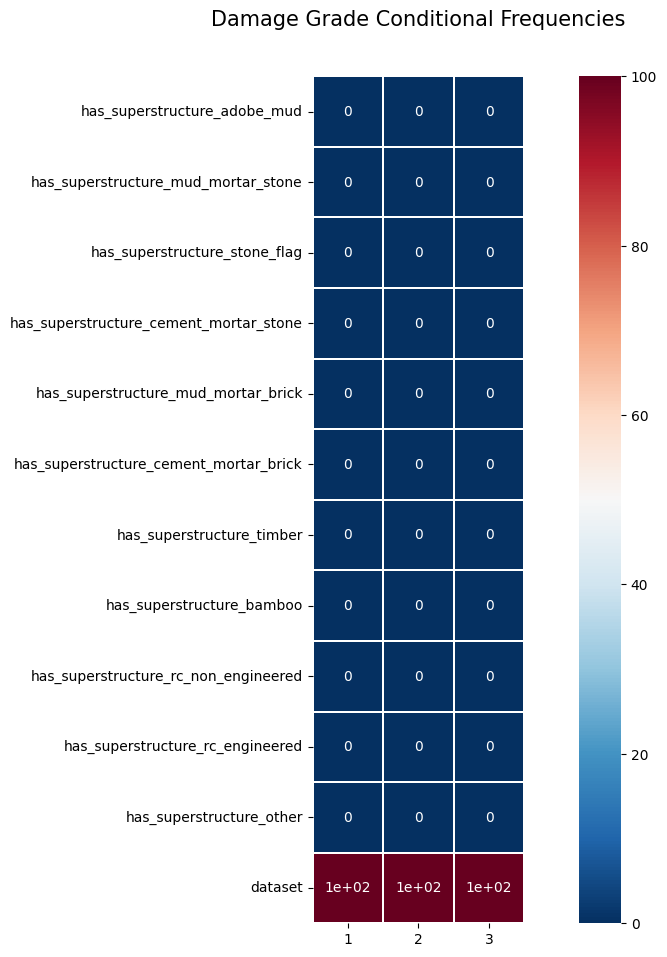

In [44]:
cmap = pd.DataFrame(columns=cols.tolist(), index=np.arange(1,4)).fillna(0)

cmap = cmap.T.fillna(0)
cmap.loc["dataset",:] = dff['damage_grade'].value_counts()/len(dff)*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,11))
plt.title('Damage Grade Conditional Frequencies', y=1.05, size=15)
sns.heatmap(cmap.fillna(100).astype(float), linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

<AxesSubplot: >

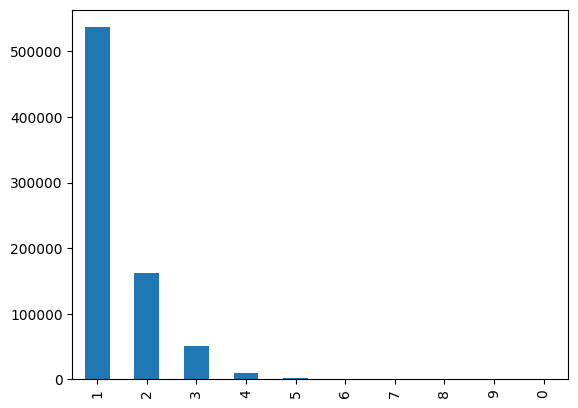

In [45]:
df[cols].T.sum().value_counts().plot.bar()


In [48]:
expected_value = pd.Series(index=np.arange(1,9))
for i in expected_value.index:
    s = df[cols].T.sum()
    index = s[s == i].index
    expected_value[i] = dff.loc[index,"damage_grade"].mean()
expected_value

/var/folders/v3/_knhttz13qd_2tcf97bv63nw0000gn/T/ipykernel_34115/2589453523.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  expected_value = pd.Series(index=np.arange(1,9))


KeyError: '[212402000211, 212402000221, 212402000071, 212402000091, 212402000201, 212402000341, 212402000361, 212402000371, 212402000381, 212404000861, 212404000881] not in index'

# Association between superstructure and features
### Here I wonder if some superstructures are always associated with certain features.I am looking for hidden patterns (civil engineering laws or techniques, relation between superstructure and wealth of residents, etc.)



/var/folders/v3/_knhttz13qd_2tcf97bv63nw0000gn/T/ipykernel_14532/1883077965.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.diag(np.diag(np.ones_like(twins, dtype=np.bool)))


<AxesSubplot:title={'center':'Conditional Frequencies'}>

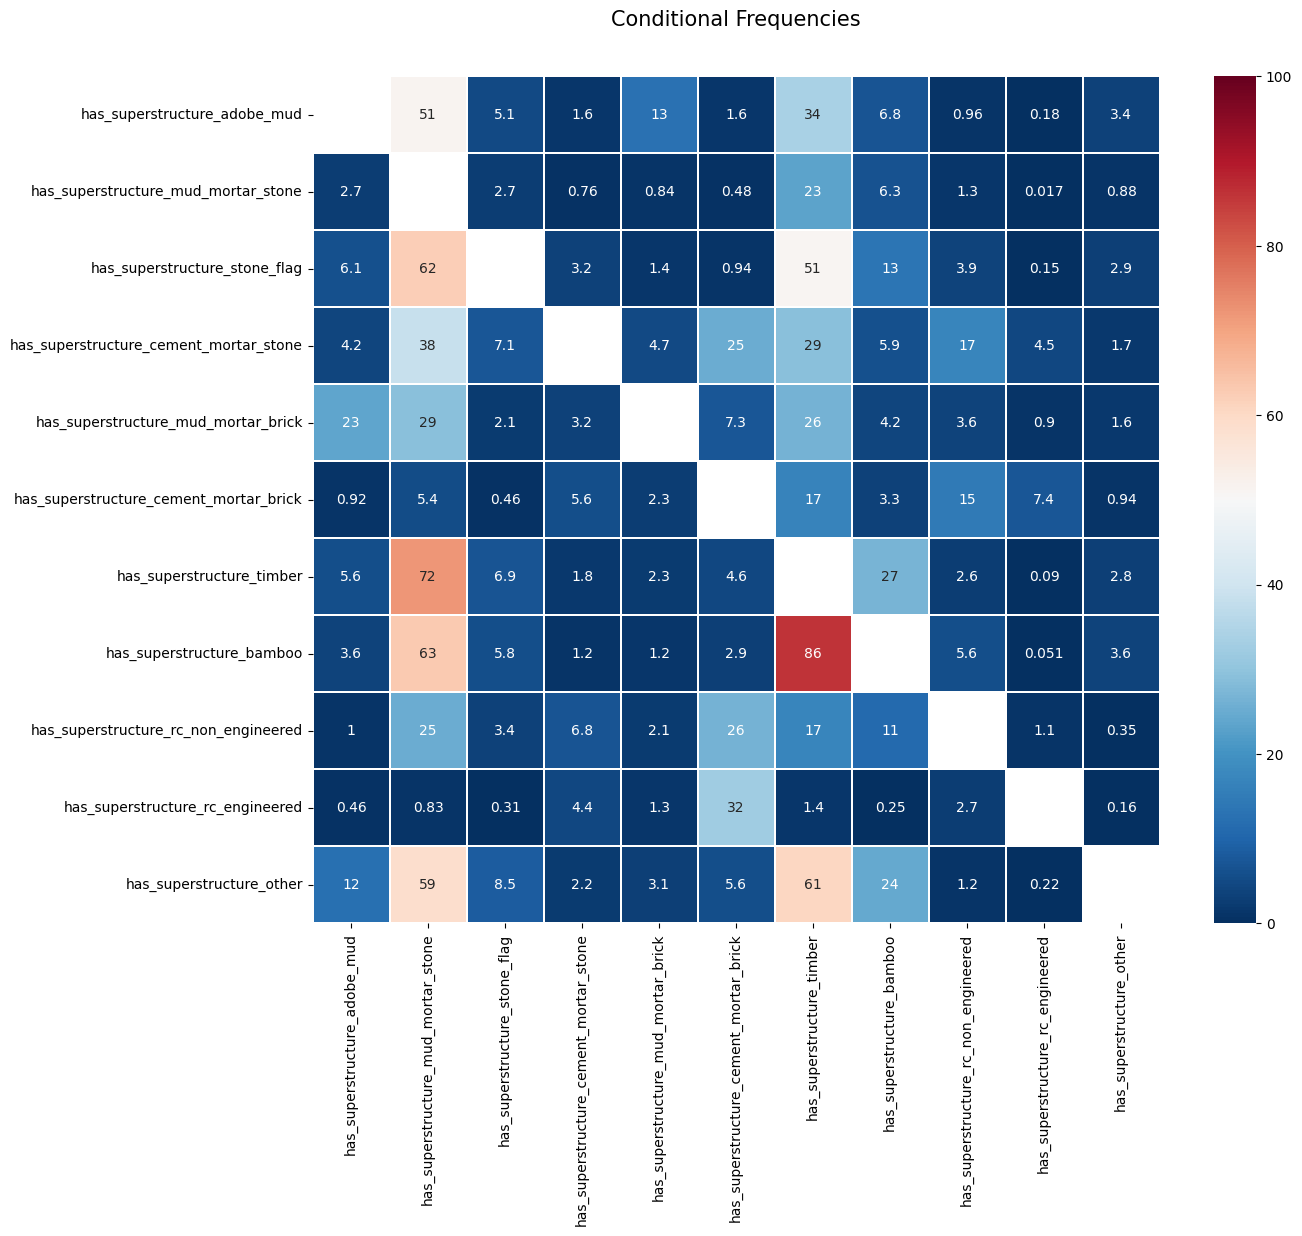

In [ ]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
twins = pd.DataFrame(index=col1, columns=col2)
done = 0
for i in twins.index:
    for c in twins.columns:
        if i !=c :
            twins.loc[i,c] = df[df[i] ==1 ][c].sum()/len(df[df[i] ==1 ])*100
colormap = plt.cm.RdBu_r
mask = np.diag(np.diag(np.ones_like(twins, dtype=np.bool)))
plt.figure(figsize=(14,11))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0, mask=mask,
            square=True, cmap=colormap, linecolor='white', annot=True)


### Superstructure X Count floors - divided by count floors



<AxesSubplot:title={'center':'Conditional Frequencies'}>

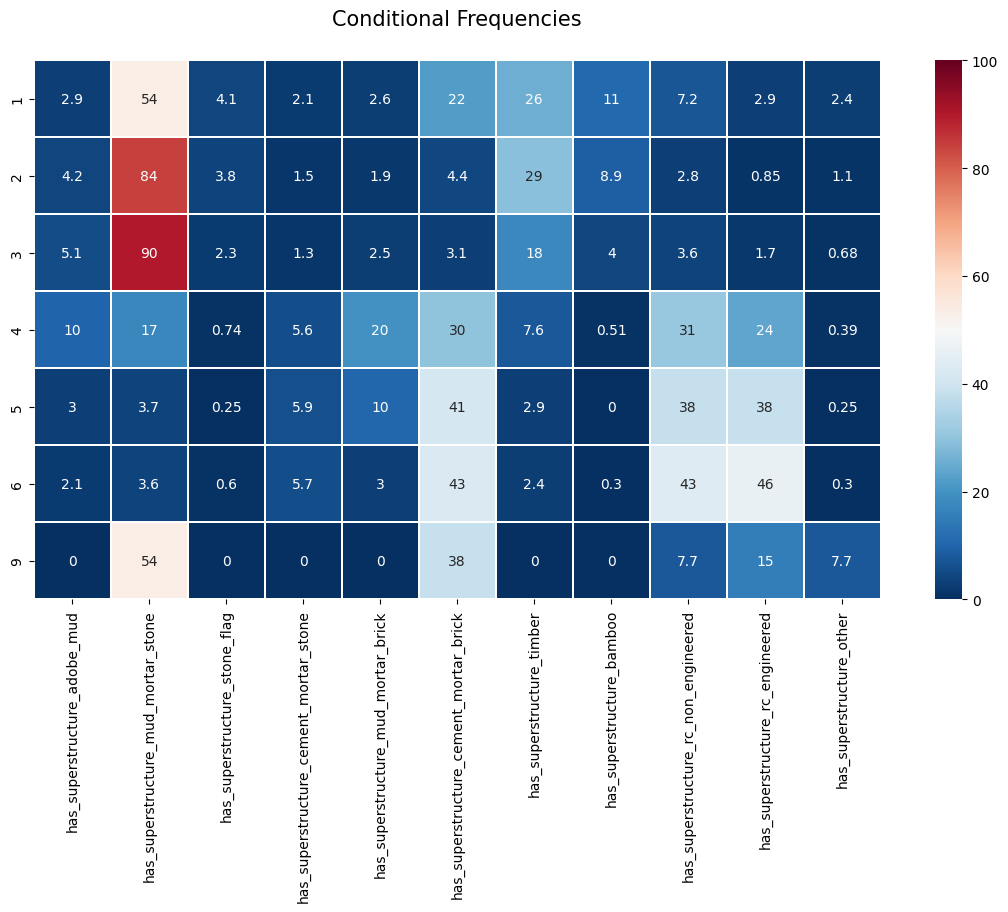

In [ ]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['count_floors_pre_eq'].unique()[:7])
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['count_floors_pre_eq'] == i ][c].sum()/len(df[df["count_floors_pre_eq"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,7))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

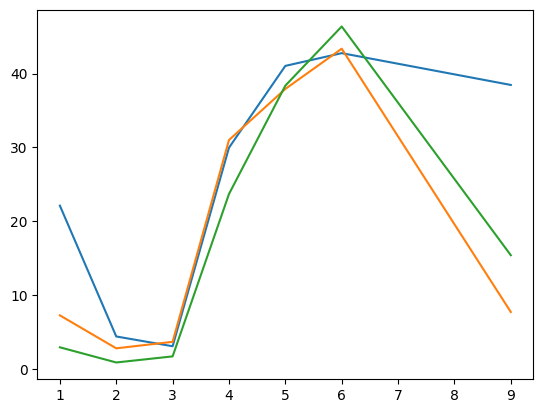

In [ ]:
plt.plot(twins["has_superstructure_cement_mortar_brick"])
plt.plot(twins["has_superstructure_rc_non_engineered"])
plt.plot(twins["has_superstructure_rc_engineered"])


##### Some superstructures are correlated with the number of floors.




### Superstructure X Count floors - divided by superstructure





<AxesSubplot:title={'center':'Conditional Frequencies'}>

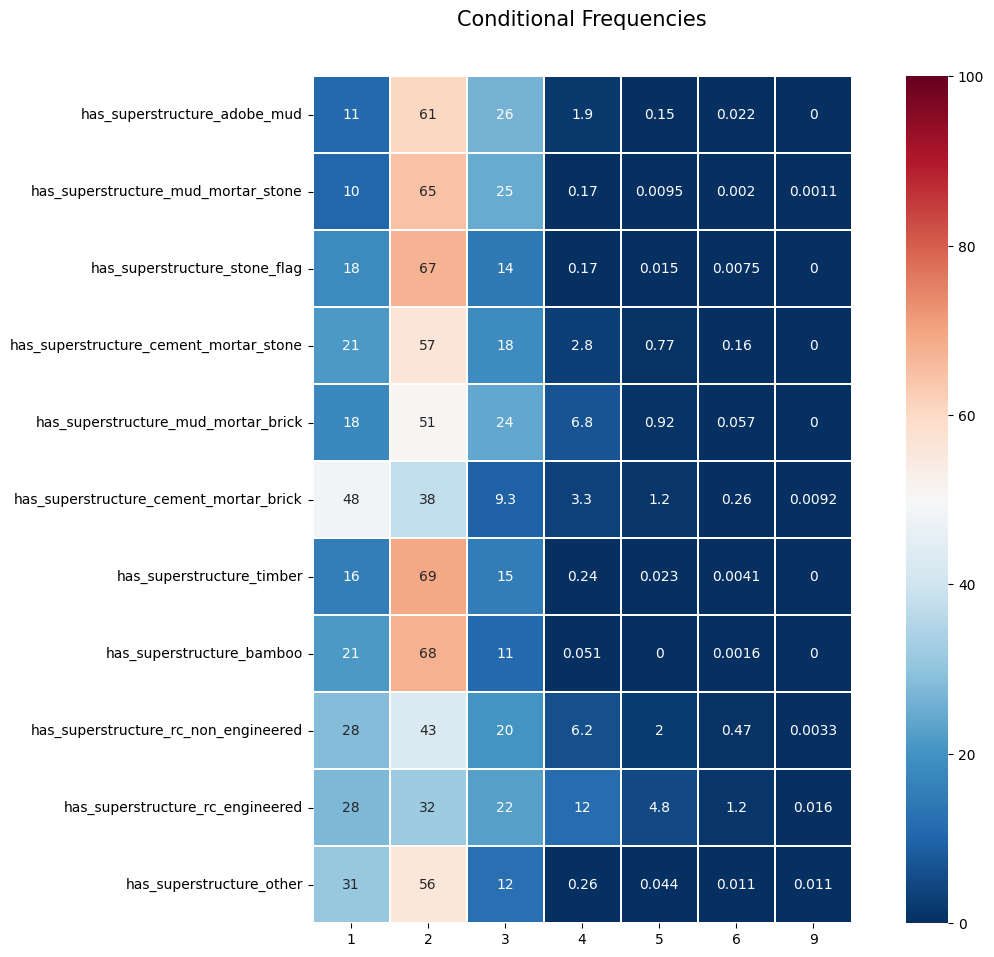

In [ ]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col2 = np.sort(df['count_floors_pre_eq'].unique()[:7])
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['count_floors_pre_eq'] == c ][i].sum()/len(df[df[i] == 1 ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,11))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)




##### I expected some superstructures to be used only with high-leveled buildings, but it is not the case.



### Superstructure X Age - divided by age



<AxesSubplot:title={'center':'Conditional Frequencies'}>

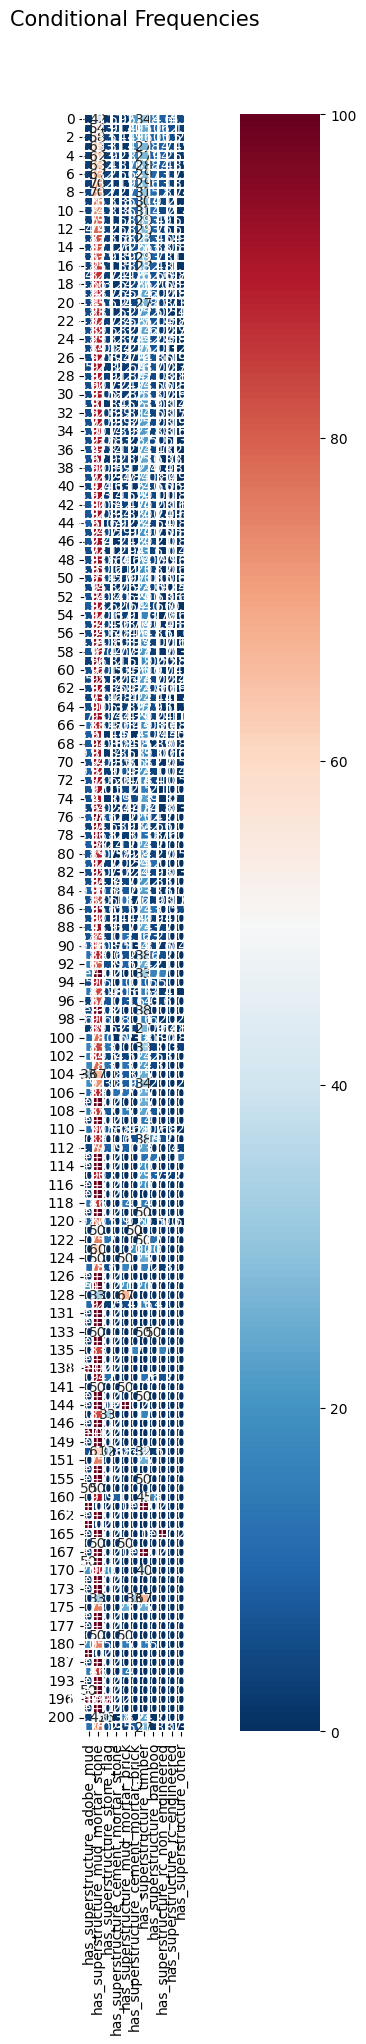

In [ ]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['age_building'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['age_building'] == i ][c].sum()/len(df[df["age_building"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,21))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

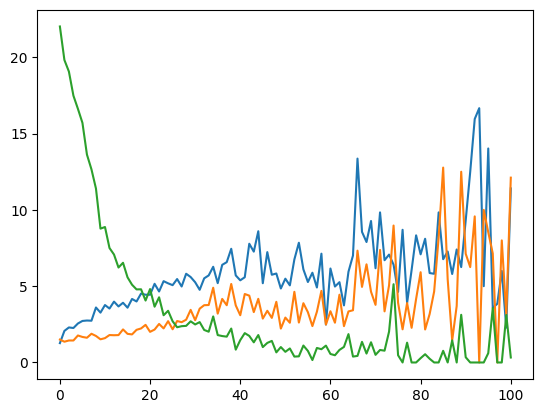

In [ ]:
plt.plot(twins.loc[:100,"has_superstructure_adobe_mud"])
plt.plot(twins.loc[:100,"has_superstructure_mud_mortar_brick"])
plt.plot(twins.loc[:100,"has_superstructure_cement_mortar_brick"])


### Superstructure X Count floors after earthquake - divided by superstructure





<AxesSubplot:title={'center':'Conditional Frequencies'}>

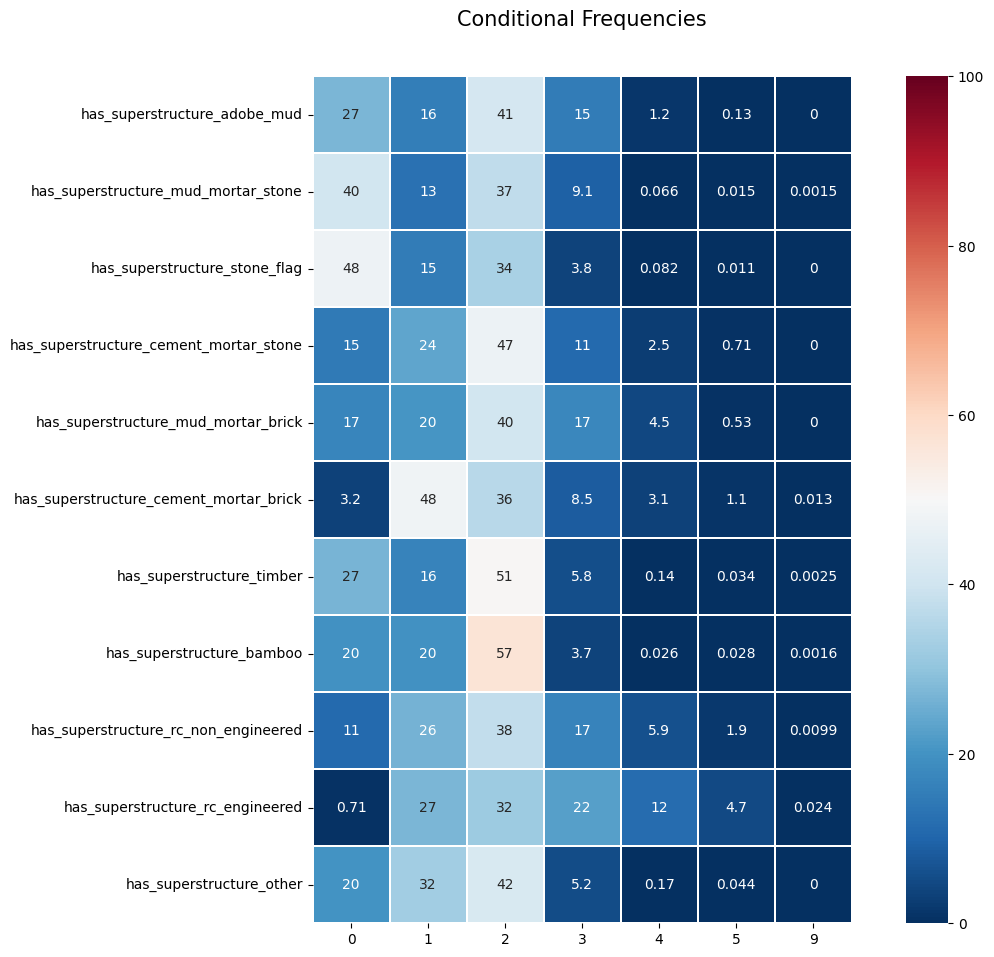

In [ ]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col2 = np.sort(df['count_floors_post_eq'].unique()[:7])
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['count_floors_post_eq'] == c ][i].sum()/len(df[df[i] == 1 ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,11))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)




### Superstructure X Area percentage (binned) - divided by area percentage







/var/folders/v3/_knhttz13qd_2tcf97bv63nw0000gn/T/ipykernel_14532/1262314229.py:5: RuntimeWarning: invalid value encountered in long_scalars
  twins.loc[i,c] = df[df['plinth_area_sq_ft'].isin(np.arange(i-9,i+1))][c].sum()/len(df[df["plinth_area_sq_ft"].isin(np.arange(i-9,i+1))])*100


<AxesSubplot:title={'center':'Conditional Frequencies'}>

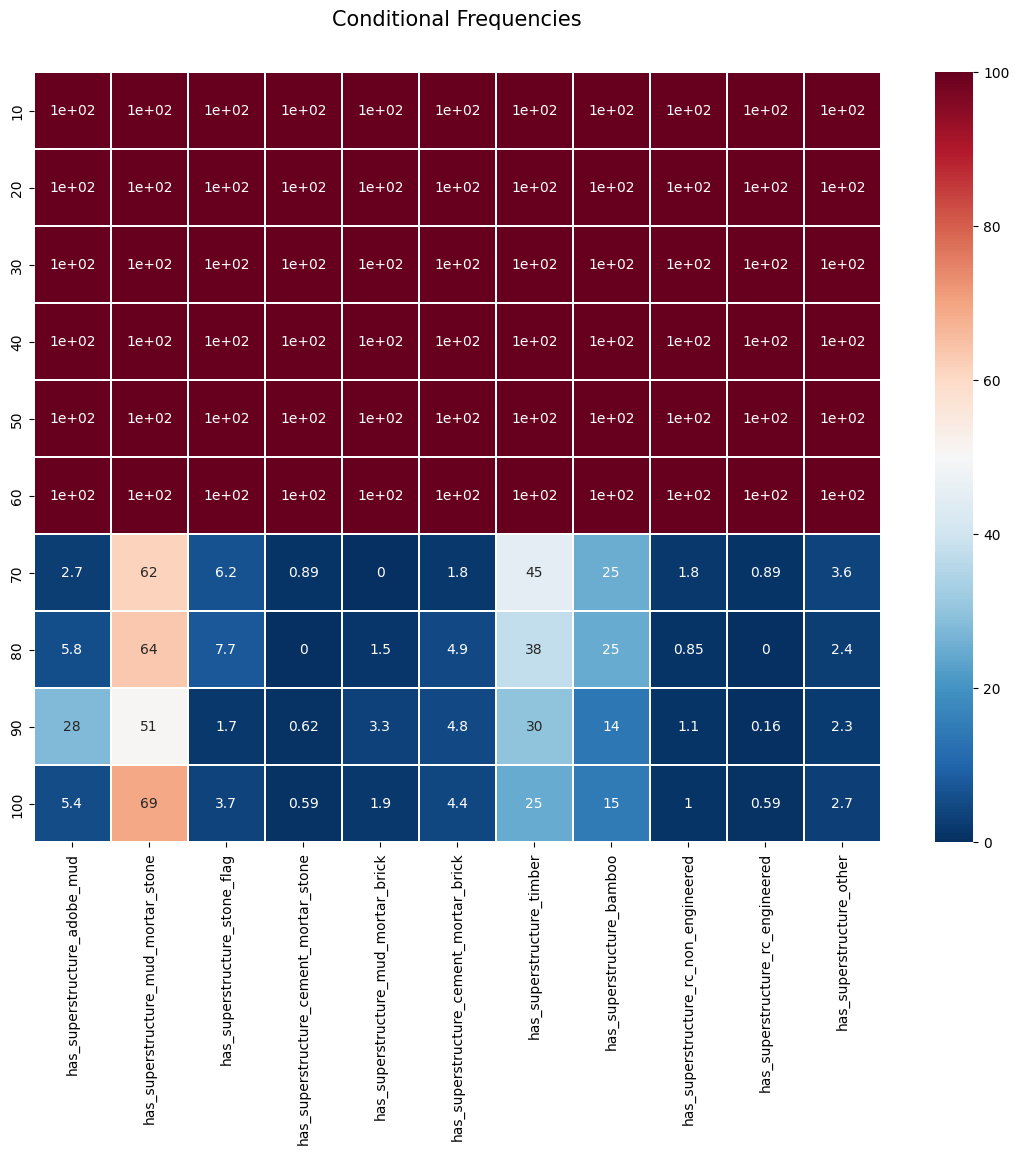

In [ ]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
twins = pd.DataFrame(index=np.arange(10,110,10), columns=col1)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['plinth_area_sq_ft'].isin(np.arange(i-9,i+1))][c].sum()/len(df[df["plinth_area_sq_ft"].isin(np.arange(i-9,i+1))])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,10))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)


### SSuperstructure X percentage (binned) - divided by height percentage (before earthquake)





<AxesSubplot:title={'center':'Conditional Frequencies'}>

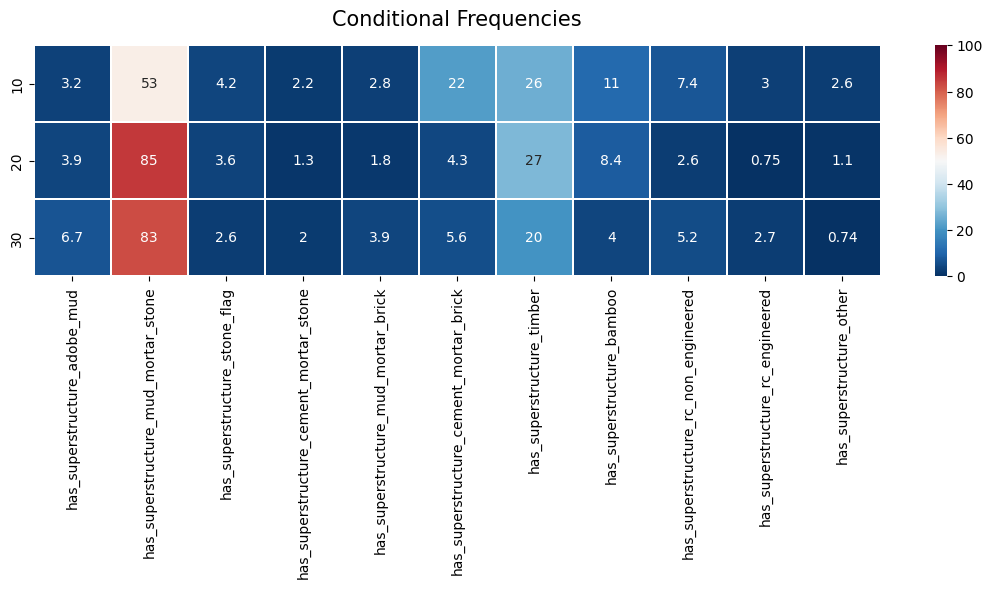

In [ ]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
twins = pd.DataFrame(index=np.arange(10,40,10), columns=col1)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['height_ft_pre_eq'].isin(np.arange(i-9,i+1))][c].sum()/len(df[df["height_ft_pre_eq"].isin(np.arange(i-9,i+1))])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,3))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)


### SSuperstructure X percentage (binned) - divided by height percentage (after earthquake)





<AxesSubplot:title={'center':'Conditional Frequencies'}>

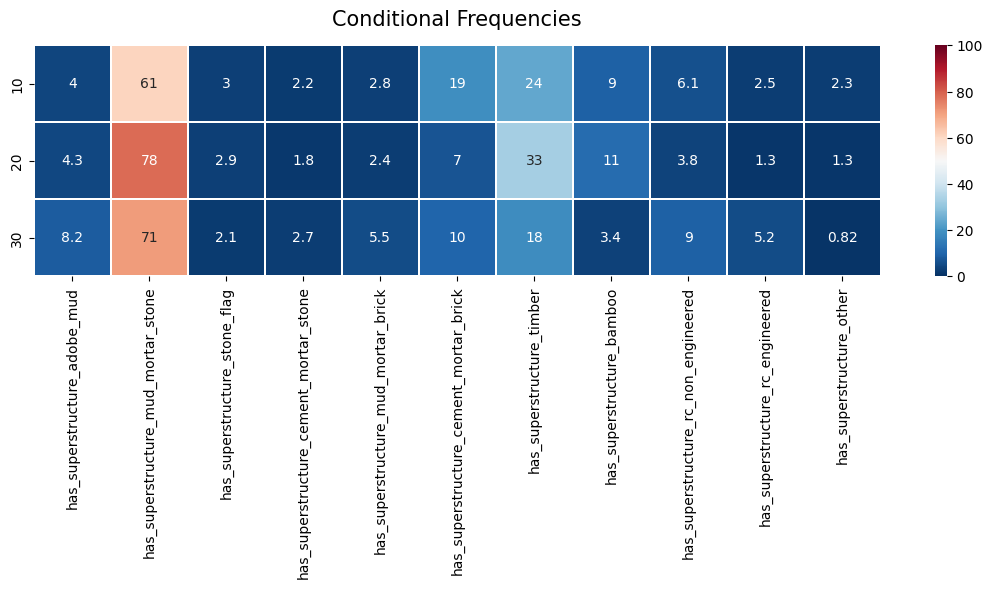

In [ ]:
col1 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
twins = pd.DataFrame(index=np.arange(10,40,10), columns=col1)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['height_ft_post_eq'].isin(np.arange(i-9,i+1))][c].sum()/len(df[df["height_ft_post_eq"].isin(np.arange(i-9,i+1))])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,3))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)


### Superstructure X Land surface condition - divided by sufrace condition







<AxesSubplot:title={'center':'Conditional Frequencies'}>

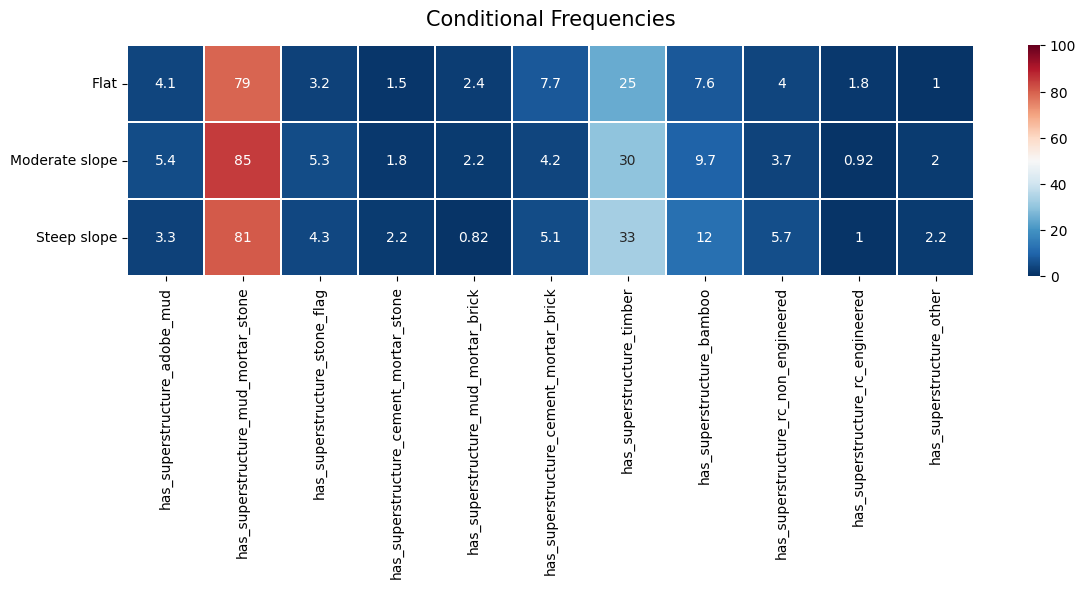

In [ ]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['land_surface_condition'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['land_surface_condition'] == i ][c].sum()/len(df[df["land_surface_condition"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,3))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)

Each superstructure is quite uniformly distributed in each land surface condition and we can not draw any conclusion out of this tab.


### Superstructure X Foundation type - divided by foundation type









<AxesSubplot:title={'center':'Conditional Frequencies'}>

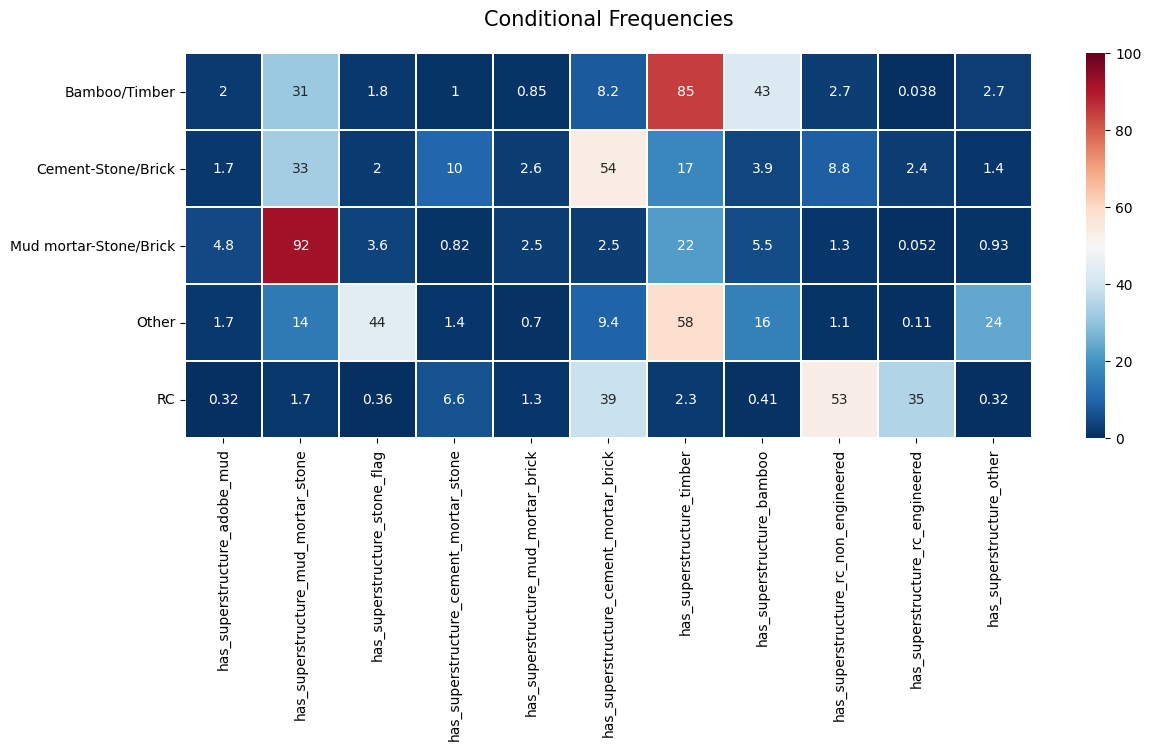

In [ ]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['foundation_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['foundation_type'] == i ][c].sum()/len(df[df["foundation_type"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,5))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)


### Superstructure X Roof type - divided by roof type









<AxesSubplot:title={'center':'Conditional Frequencies'}>

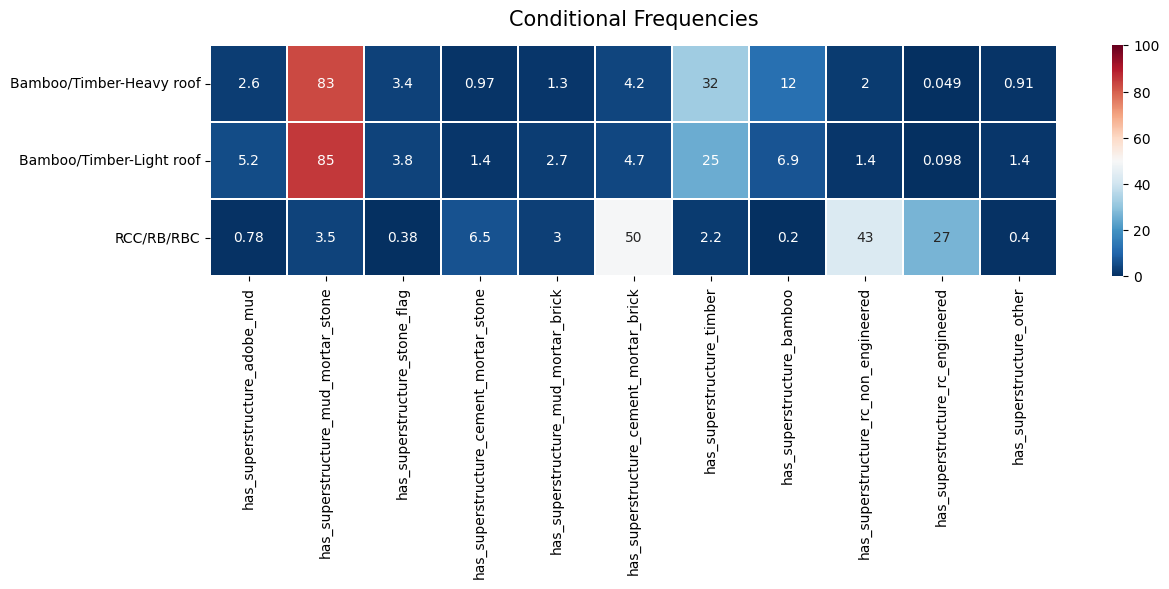

In [ ]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['roof_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['roof_type'] == i ][c].sum()/len(df[df["roof_type"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,3))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)


### Superstructure X Ground floor type - divided by ground floor type









<AxesSubplot:title={'center':'Conditional Frequencies'}>

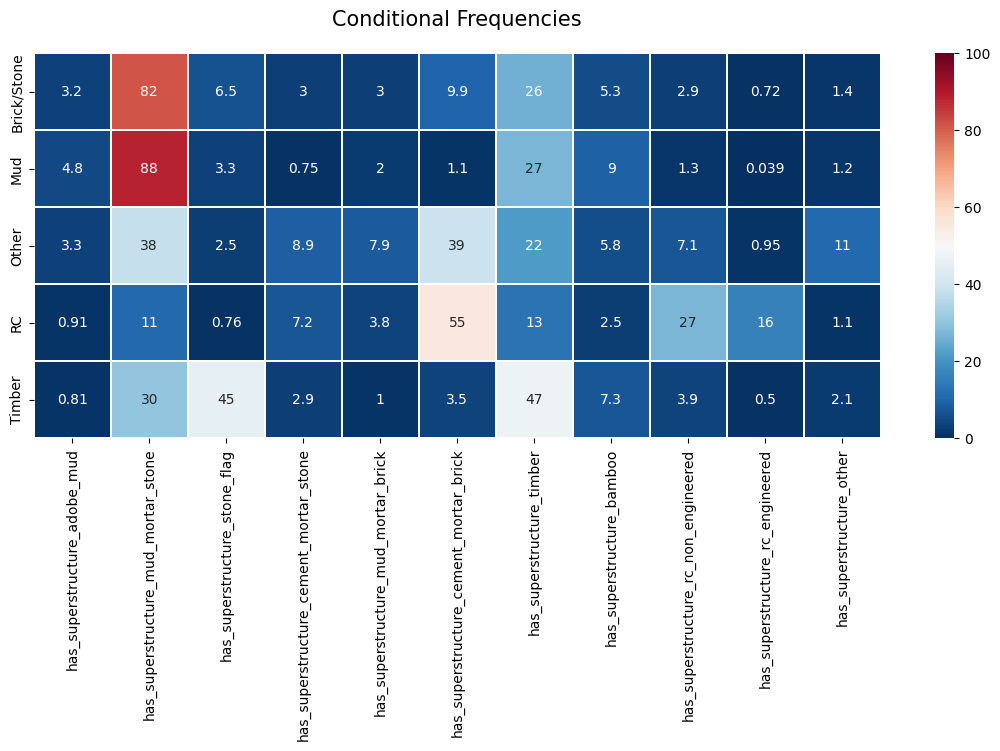

In [ ]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['ground_floor_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['ground_floor_type'] == i ][c].sum()/len(df[df["ground_floor_type"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,5))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)


### Superstructure X Other floor type - divided by other floor type










<AxesSubplot:title={'center':'Conditional Frequencies'}>

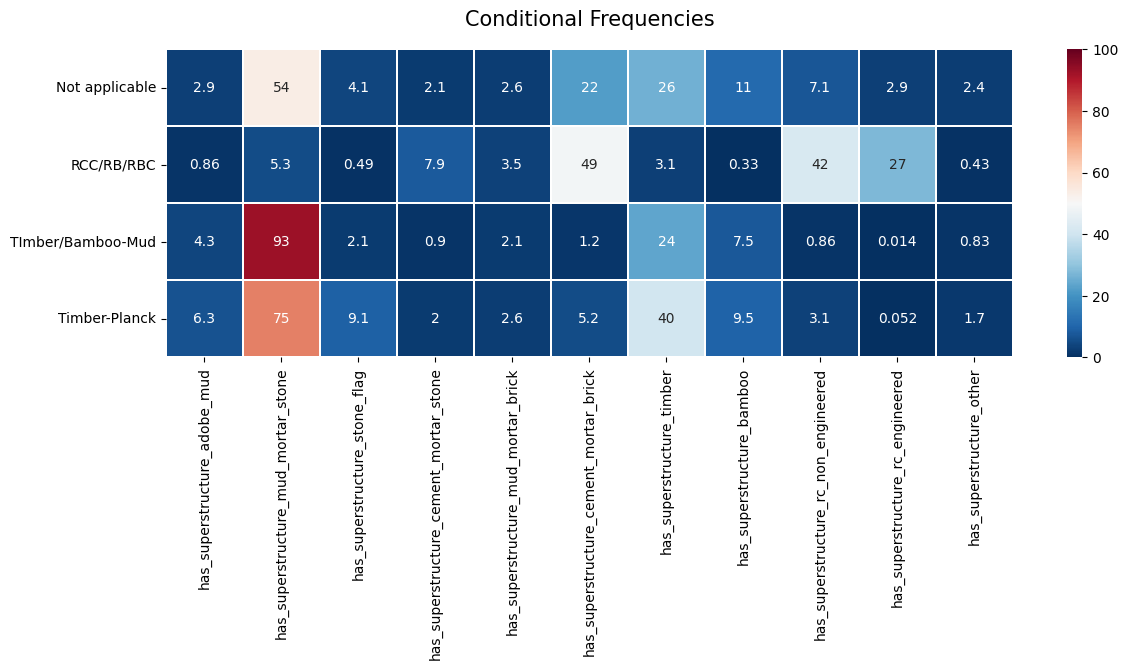

In [ ]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['other_floor_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['other_floor_type'] == i ][c].sum()/len(df[df["other_floor_type"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,4))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)


In [ ]:
dff.other_floor_type.unique()

NameError: name 'dff' is not defined


### Superstructure X plan configuration - divided by plan configuration











/var/folders/v3/_knhttz13qd_2tcf97bv63nw0000gn/T/ipykernel_14532/1979120136.py:6: RuntimeWarning: invalid value encountered in long_scalars
  twins.loc[i,c] = df[df['plan_configuration'] == i ][c].sum()/len(df[df["plan_configuration"] == i ])*100


<AxesSubplot:title={'center':'Conditional Frequencies'}>

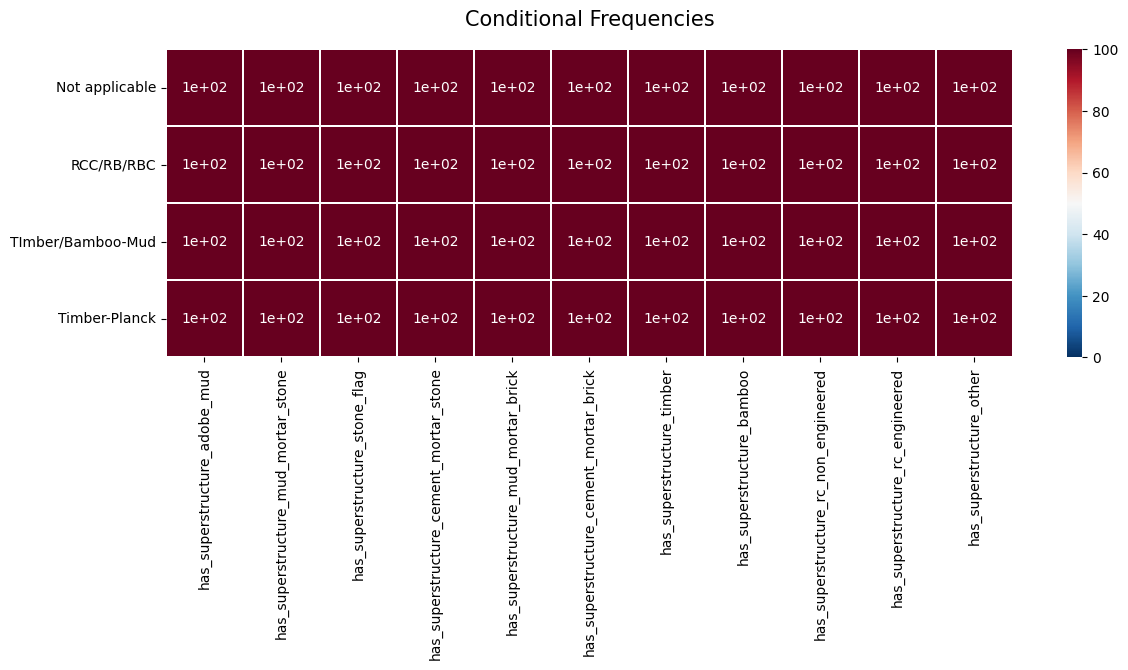

In [ ]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['other_floor_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['plan_configuration'] == i ][c].sum()/len(df[df["plan_configuration"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,4))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)



### Superstructure X condition post earthquake - divided by condition post 











/var/folders/v3/_knhttz13qd_2tcf97bv63nw0000gn/T/ipykernel_14532/724279344.py:6: RuntimeWarning: invalid value encountered in long_scalars
  twins.loc[i,c] = df[df['condition_post_eq'] == i ][c].sum()/len(df[df["condition_post_eq"] == i ])*100


<AxesSubplot:title={'center':'Conditional Frequencies'}>

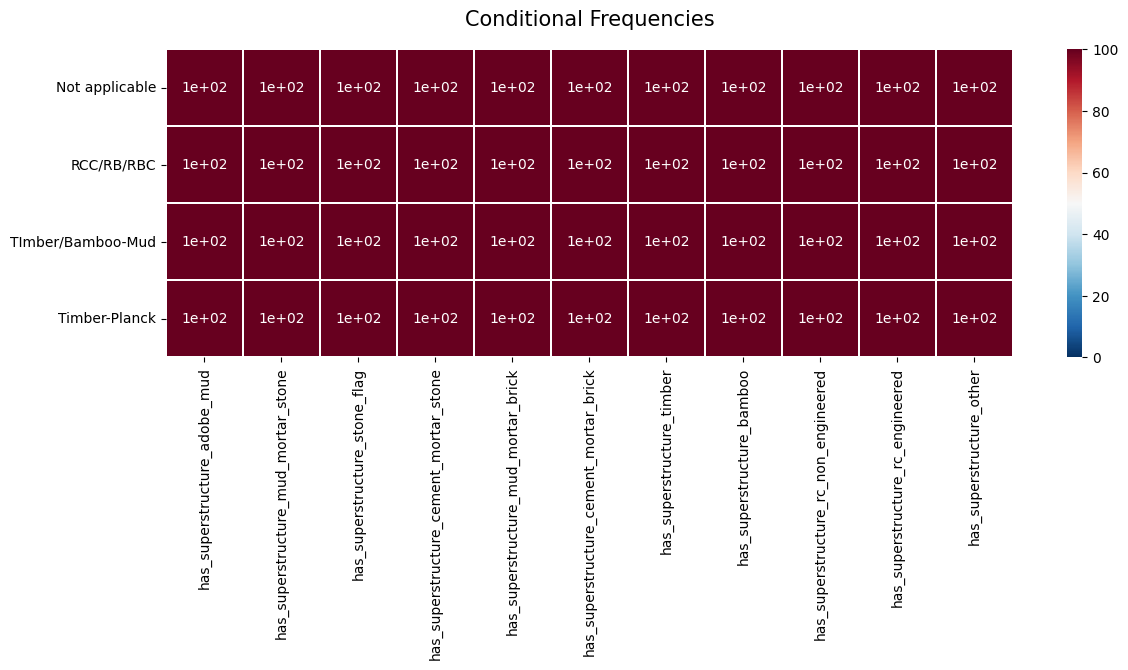

In [ ]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['other_floor_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['condition_post_eq'] == i ][c].sum()/len(df[df["condition_post_eq"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,4))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)



### Superstructure X technical_solution_proposed - divided by condition post 











/var/folders/v3/_knhttz13qd_2tcf97bv63nw0000gn/T/ipykernel_14532/2489595855.py:6: RuntimeWarning: invalid value encountered in long_scalars
  twins.loc[i,c] = df[df['technical_solution_proposed'] == i ][c].sum()/len(df[df["technical_solution_proposed"] == i ])*100


<AxesSubplot:title={'center':'Conditional Frequencies'}>

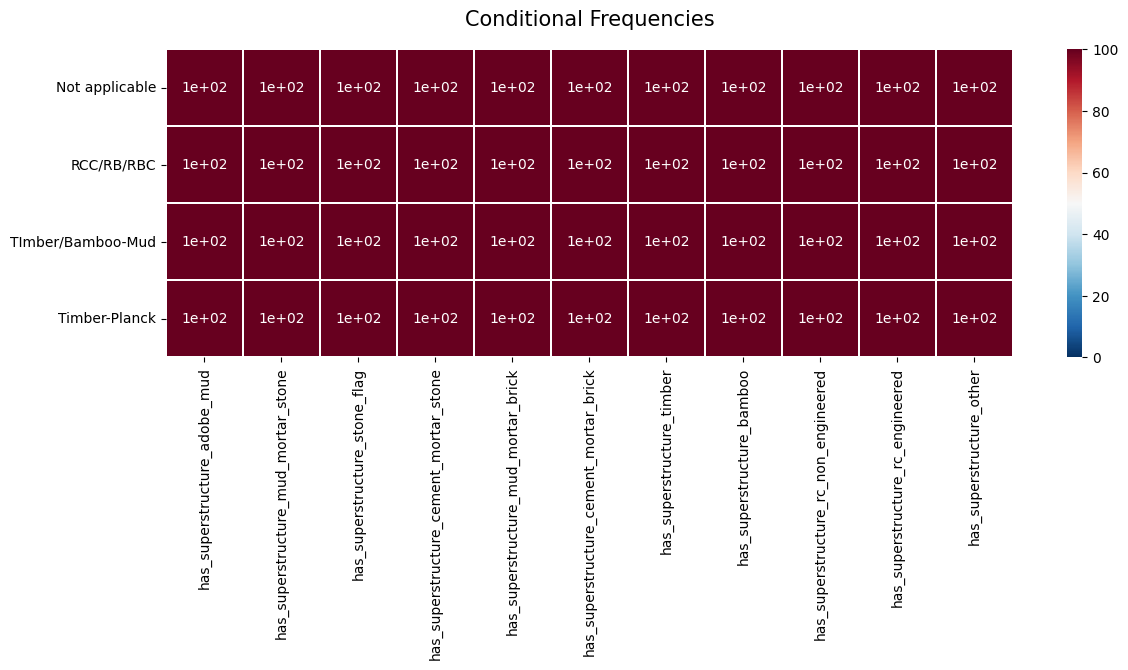

In [ ]:
col2 = df.loc[:,'has_superstructure_adobe_mud':'has_superstructure_other'].columns
col1 = np.sort(df['other_floor_type'].unique())
twins = pd.DataFrame(index=col1, columns=col2)
for i in twins.index:
    for c in twins.columns:
        twins.loc[i,c] = df[df['technical_solution_proposed'] == i ][c].sum()/len(df[df["technical_solution_proposed"] == i ])*100
colormap = plt.cm.RdBu_r
plt.figure(figsize=(14,4))
plt.title('Conditional Frequencies', y=1.05, size=15)
sns.heatmap(twins.fillna(100).astype(float) ,linewidths=0.1, vmax=100, vmin=0,
            square=True, cmap=colormap, linecolor='white', annot=True)


In [ ]:
dff.technical_solution_proposed.unique()

array(['Major repair', 'Reconstruction', 'Minor repair', 'No need'],
      dtype=object)

/var/folders/v3/_knhttz13qd_2tcf97bv63nw0000gn/T/ipykernel_14532/3894176355.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

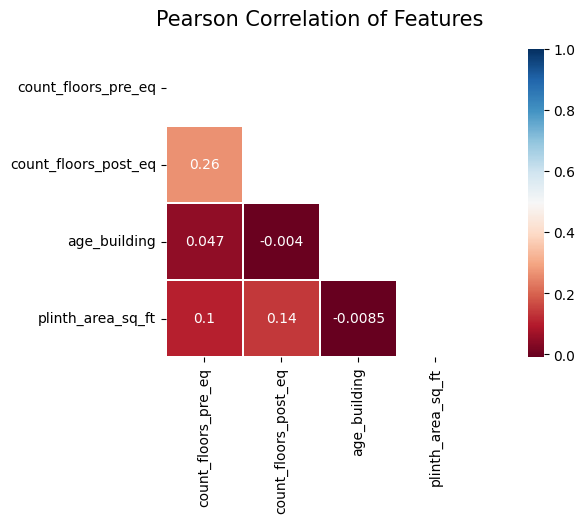

In [ ]:
colormap = plt.cm.RdBu
corr = df.iloc[:,3:7].astype(float).corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.figure(figsize=(14,4))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(corr ,linewidths=0.1,vmax=1.0, mask=mask,
            square=True, cmap=colormap, linecolor='white', annot=True)

Despite not having high correlation frequencies, we could say that analyzing these variables for our prediction model can be interesting: plinth_area_sq_ft and the count_floors pre earthquake and after .